In [1]:
using ModelingToolkit, OrdinaryDiffEq, DifferentialEquations, LinearAlgebra, SparseArrays

In [2]:
using PyPlot, NNlib,  ImageFiltering, Images, MEngProject, MEngProject.LamKernels, MEngProject.Laminart, MEngProject.Utils, BenchmarkTools

┌ Warning: Hardware is unsupported by NNPACK so falling back to default NNlib
└ @ NNlib /Users/niallcullinane/.julia/packages/NNlib/GhWiz/src/nnpack/NNPACK.jl:42
┌ Info: Precompiling MEngProject [d0493a11-efc0-4c7c-9b66-d0bd5a04cc55]
└ @ Base loading.jl:1260
┌ Warning: Hardware is unsupported by NNPACK so falling back to default NNlib
└ @ NNlib ~/.julia/packages/NNlib/GhWiz/src/nnpack/NNPACK.jl:42


In [3]:
using MEngProject.Laminartv1

In [7]:
img = convert(Array{Float32,2}, load("../input_img/Iine_100_100_gs.png"));
p = Laminart.kernels(img, Parameters.parameters);
p = Laminart.add_I_u_p(img, p);


In [3]:
using Test

0.0f0

In [13]:
function nn!(a, b, c)
    @. a = b + c
end
function nn(b, c)
     b + c
end

nn (generic function with 1 method)

In [14]:
aa = rand(1000,1000)
bb = zeros(1000,1000)
cc = ones(1000,1000);
@benchmark nn!(aa,bb,cc)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     1.857 ms (0.00% GC)
  median time:      2.133 ms (0.00% GC)
  mean time:        2.357 ms (0.00% GC)
  maximum time:     5.390 ms (0.00% GC)
  --------------
  samples:          2096
  evals/sample:     1

In [23]:
@test aa == cc

Test Passed

In [16]:
ac = rand(1000,1000)
bb = zeros(1000,1000)
cc = ones(1000,1000);
@benchmark ac .= nn(bb,cc)

BenchmarkTools.Trial: 
  memory estimate:  7.63 MiB
  allocs estimate:  4
  --------------
  minimum time:     3.448 ms (0.00% GC)
  median time:      4.882 ms (0.00% GC)
  mean time:        5.778 ms (14.04% GC)
  maximum time:     21.365 ms (75.00% GC)
  --------------
  samples:          861
  evals/sample:     1

In [21]:
@test ac == cc

Test Passed

In [30]:
ac

1000×1000 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  

In [31]:
function nnn!(a,b)
    a = imfilter!(a, b, Kernel.gaussian(0.5))
end

nnn! (generic function with 2 methods)

In [36]:
bb = zeros(1000,1000)
nnn!(bb, cc)

1000×1000 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  

In [37]:
bb

1000×1000 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  

In [44]:
function nm!(o, a,b,s)
    temp = similar(o)
    imfilter!(temp, b, Kernel.gaussian(2))
    @. o = s * max(a, 0) + (temp)
end

nm! (generic function with 1 method)

In [45]:
s = 2
out = rand(1000,1000)
a = 2 .* ones(1000,1000)
b = 3 .* ones(1000,1000)
nm!(out, a, b, s )

1000×1000 Array{Float64,2}:
 7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0  …  7.0  7.0  7.0  7.0  7.0  7.0  7.0
 7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0     7.0  7.0  7.0  7.0  7.0  7.0  7.0
 7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0     7.0  7.0  7.0  7.0  7.0  7.0  7.0
 7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0     7.0  7.0  7.0  7.0  7.0  7.0  7.0
 7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0     7.0  7.0  7.0  7.0  7.0  7.0  7.0
 7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0  …  7.0  7.0  7.0  7.0  7.0  7.0  7.0
 7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0     7.0  7.0  7.0  7.0  7.0  7.0  7.0
 7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0     7.0  7.0  7.0  7.0  7.0  7.0  7.0
 7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0     7.0  7.0  7.0  7.0  7.0  7.0  7.0
 7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0     7.0  7.0  7.0  7.0  7.0  7.0  7.0
 7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0  …  7.0  7.0  7.0  7.0  7.0  7.0  7.0
 7.0  7.0  7.0  7.0  7.0  7.0  7.0  7.0     7.0  7.0  7.0  7.0  7.0  7.0  7.0
 7.0  7.0  7.0  7.0  7.0  7.0  7.0  

In [ ]:
max()

In [46]:
function fun_dv(v::AbstractArray, u::AbstractArray, x_lgn::AbstractArray, p::NamedTuple)
    return p.δ_v .* ( .- v .+
            ((1 .- v) .* max.(u,0) .* (1 .+ p.C_1 .* x_lgn)) .-
            ((1 .+ v) .* p.C_2 .* imfilter(x_lgn, (centered(p.k_gauss_1),), p.filling)))
end

fun_dv (generic function with 1 method)

In [60]:
function fun_dv!(dv::AbstractArray, v::AbstractArray, u::AbstractArray, x_lgn::AbstractArray, p::NamedTuple)
    imfilter!(dv, x_lgn, (centered(p.k_gauss_1),), p.filling)
    @. dv = p.δ_v * ( - v +
            ((1 - v) * max.(u,0) * (1 + p.C_1 * x_lgn)) -
            ((1 + v) * p.C_2 * dv))
end

fun_dv! (generic function with 1 method)

In [158]:
function fun_dv!(dv::AbstractArray, v::AbstractArray, u::AbstractArray, x_lgn::AbstractArray, p::NamedTuple)
    imfilter!(dv, x_lgn, (centered(p.k_gauss_1),), p.filling)
    @. dv = p.δ_v * ( - v +
            ((1 - v) * max(u,0) * (1 + p.C_1 * x_lgn)) -
            ((1 + v) * p.C_2 * dv))
    return nothing
end

fun_dv! (generic function with 1 method)

In [159]:
dv = zeros(1000,1000)
dva = zeros(1000,1000)
v = ones(1000,1000)
u = 2 .*ones(1000,1000)
x_lgn = 3 .* ones(1000,1000);

In [160]:
@benchmark dva = fun_dv(v,u,x_lgn,p)

UndefVarError: UndefVarError: fun_dv not defined

In [161]:
@benchmark fun_dv!(dv, v,u,x_lgn,p)

BenchmarkTools.Trial: 
  memory estimate:  7.71 MiB
  allocs estimate:  62
  --------------
  minimum time:     35.676 ms (0.00% GC)
  median time:      40.768 ms (0.00% GC)
  mean time:        42.912 ms (2.43% GC)
  maximum time:     68.980 ms (27.04% GC)
  --------------
  samples:          117
  evals/sample:     1

In [64]:
dva = fun_dv(v,u,x_lgn,p)
@test fun_dv!(dv, v,u,x_lgn,p) == dva 

Test Passed

LoadError: ArgumentError: Invalid use of @view macro: argument must be a reference expression A[...].

In [125]:
function fun_v_C_(v_p::AbstractArray, v_m::AbstractArray, p::NamedTuple)
    V = exp(-1/8) .* (imfilter((max.(v_p,0)-max.(v_m,0)), (centered(p.k_gauss_2),), p.filling))

    A = reshape(Array{eltype(V)}(undef, size(V)[1], size(V)[2]*p.K),size(V)[1],size(V)[2],p.K)
    B = copy(A)

    for k in 1:p.K
        A[:,:,k] = imfilter(V, (centered(p.k_C_d[:,:,k]),), p.filling)
        B[:,:,k] = abs.(imfilter(V, (centered(p.k_C_b[:,:,k]),), p.filling))
    end

    return p.γ .* (max.(A .- B, 0) .+ max.(.- A .- B, 0))
end

fun_v_C_ (generic function with 1 method)

In [151]:
function fun_v_Ca!(v_C::AbstractArray, v_p::AbstractArray, v_m::AbstractArray, p::NamedTuple)
    V = similar(v_p)
    @. V = max.(v_p,0) - max.(v_m,0)
    imfilter!(V, V, (centered(p.k_gauss_2),), p.filling)
    @. V = exp(-1/8) * V
    A = similar(v_C)
    B = similar(v_C)
    
    for k in 1:p.K
        imfilter!(A[:,:,k], V, (centered(p.k_C_d[:,:,k]),), p.filling)
        imfilter!(B[:,:,k], V, (centered(p.k_C_b[:,:,k]),), p.filling)
    end
    @. B = abs(B)
    @. v_C = p.γ * (max(A - B, 0) + max(-A - B, 0))
end

fun_v_Ca! (generic function with 1 method)

In [127]:
function fun_v_Cb!(v_C::AbstractArray, v_p::AbstractArray, v_m::AbstractArray, p::NamedTuple)
    V = similar(v_p)
#     @. V = 
    imfilter!(V, (max.(v_p,0) - max.(v_m,0)), (centered(p.k_gauss_2),), p.filling)
    @. V = exp(-1/8) * V
    A = similar(v_C)
    B = similar(v_C)
    
    for k in 1:p.K
        imfilter!(A[:,:,k], V, (centered(p.k_C_d[:,:,k]),), p.filling)
        imfilter!(B[:,:,k], V, (centered(p.k_C_b[:,:,k]),), p.filling)
    end
    @. B = abs(B)
    @. v_C = p.γ * (max(A - B, 0) + max(-A - B, 0))
end

fun_v_Cb! (generic function with 1 method)

In [131]:
v_C = reshape(zeros(100,200),100, 100, 2)

100×100×2 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [132]:
@benchmark v_C = fun_v_C_(p.r, .-p.r, p)

BenchmarkTools.Trial: 
  memory estimate:  1.57 MiB
  allocs estimate:  108
  --------------
  minimum time:     1.707 ms (0.00% GC)
  median time:      2.266 ms (0.00% GC)
  mean time:        2.642 ms (7.80% GC)
  maximum time:     41.888 ms (92.60% GC)
  --------------
  samples:          1881
  evals/sample:     1

In [152]:
@benchmark fun_v_Ca!(v_C, p.r, .-p.r, p)

BenchmarkTools.Trial: 
  memory estimate:  1.07 MiB
  allocs estimate:  92
  --------------
  minimum time:     1.714 ms (0.00% GC)
  median time:      2.128 ms (0.00% GC)
  mean time:        2.364 ms (5.19% GC)
  maximum time:     37.039 ms (93.92% GC)
  --------------
  samples:          2105
  evals/sample:     1

In [134]:
@benchmark fun_v_Cb!(v_C, p.r, .-p.r, p)

BenchmarkTools.Trial: 
  memory estimate:  1.19 MiB
  allocs estimate:  98
  --------------
  minimum time:     1.662 ms (0.00% GC)
  median time:      2.150 ms (0.00% GC)
  mean time:        2.444 ms (5.96% GC)
  maximum time:     43.269 ms (93.61% GC)
  --------------
  samples:          2038
  evals/sample:     1

In [153]:
function fun_v_Cc!(v_C::AbstractArray, v_p::AbstractArray, v_m::AbstractArray, p::NamedTuple)
    V = similar(v_p)
    @. V = max(v_p,0) - max(v_m,0)
    imfilter!(V, V, (centered(p.k_gauss_2),), p.filling)
    @. V = exp(-1/8) * V
    A = similar(v_C)
    B = similar(v_C)
    
    for k in 1:p.K
        imfilter!(A[:,:,k], V, (centered(p.k_C_d[:,:,k]),), p.filling)
        imfilter!(B[:,:,k], V, (centered(p.k_C_b[:,:,k]),), p.filling)
    end
    @. B = abs(B)
    @. v_C = p.γ * (max(A - B, 0) + max(-A - B, 0))
end

fun_v_Cc! (generic function with 1 method)

In [138]:
@benchmark fun_v_Cc!(v_C, p.r, .-p.r, p)

BenchmarkTools.Trial: 
  memory estimate:  1.07 MiB
  allocs estimate:  92
  --------------
  minimum time:     1.618 ms (0.00% GC)
  median time:      2.117 ms (0.00% GC)
  mean time:        2.367 ms (5.08% GC)
  maximum time:     36.980 ms (94.40% GC)
  --------------
  samples:          2104
  evals/sample:     1

In [139]:
imga = copy(img)
imgb = similar(img)
imfilter!(imga, imga, (centered(p.k_gauss_2),), p.filling)
imfilter!(imgb, img, (centered(p.k_gauss_2),), p.filling)
@test imga == imgb

Test Passed

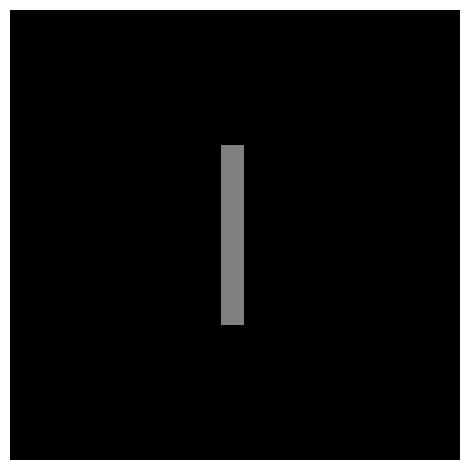

In [140]:
Utils.plot_gs(img)

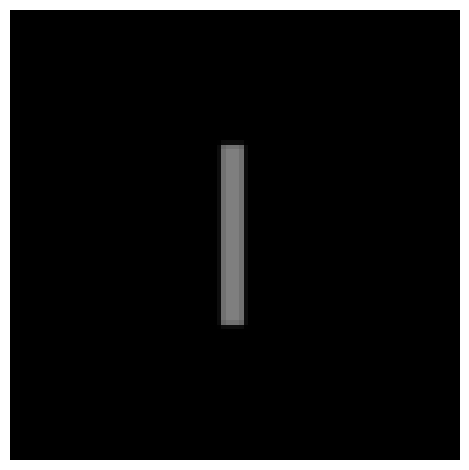

In [141]:
Utils.plot_gs(imga)

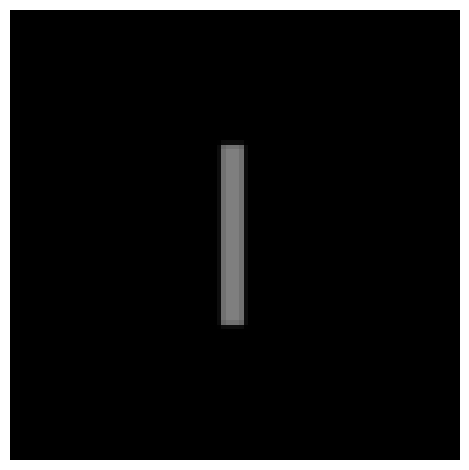

In [142]:
Utils.plot_gs(imgb)

In [144]:
function fun_v_Cd!(v_C::AbstractArray, v_p::AbstractArray, v_m::AbstractArray, p::NamedTuple)
    V = similar(v_p)
    @. V = exp(-1/8) * (max(v_p,0) - max(v_m,0))
    imfilter!(V, V, (centered(p.k_gauss_2),), p.filling)
    
    A = similar(v_C)
    B = similar(v_C)
    
    for k in 1:p.K
        imfilter!(A[:,:,k], V, (centered(p.k_C_d[:,:,k]),), p.filling)
        imfilter!(B[:,:,k], V, (centered(p.k_C_b[:,:,k]),), p.filling)
    end
    @. B = abs(B)
    @. v_C = p.γ * (max(A - B, 0) + max(-A - B, 0))
end

fun_v_Cd! (generic function with 1 method)

In [150]:
@benchmark fun_v_Cd!(v_C, p.r, .-p.r, p)

BenchmarkTools.Trial: 
  memory estimate:  1.07 MiB
  allocs estimate:  92
  --------------
  minimum time:     1.660 ms (0.00% GC)
  median time:      2.127 ms (0.00% GC)
  mean time:        2.368 ms (5.31% GC)
  maximum time:     39.019 ms (93.91% GC)
  --------------
  samples:          2100
  evals/sample:     1

In [147]:
function fun_v_Cd!(v_C::AbstractArray, v_p::AbstractArray, v_m::AbstractArray, p::NamedTuple)
    V = similar(v_p)
    @. V = max(v_p,0) - max(v_m,0)
    imfilter!(V, V, (centered(p.k_gauss_2),), p.filling)
    @. V = exp(-1/8) * V
    A = similar(v_C)
    B = similar(v_C)
    
    for k in 1:p.K
        imfilter!(A[:,:,k], V, (centered(p.k_C_d[:,:,k]),), p.filling)
        imfilter!(B[:,:,k], V, (centered(p.k_C_b[:,:,k]),), p.filling)
    end
#     @. B = abs(B)
    @. v_C = p.γ * (max(A - abs(B), 0) + max(-A - abs(B), 0))
end

fun_v_Cd! (generic function with 1 method)

In [149]:
@benchmark fun_v_Cd!(v_C, p.r, .-p.r, p)

BenchmarkTools.Trial: 
  memory estimate:  1.07 MiB
  allocs estimate:  92
  --------------
  minimum time:     1.654 ms (0.00% GC)
  median time:      2.096 ms (0.00% GC)
  mean time:        2.334 ms (5.65% GC)
  maximum time:     36.247 ms (93.71% GC)
  --------------
  samples:          2143
  evals/sample:     1

In [154]:
function fun_v_Ce!(v_C::AbstractArray, v_p::AbstractArray, v_m::AbstractArray, p::NamedTuple)
    V = similar(v_p)
    @. V = max(v_p,0) - max(v_m,0)
    imfilter!(V, V, (centered(p.k_gauss_2),), p.filling)
    @. V = exp(-1/8) * V
#     A = similar(v_C)
    B = similar(v_C)
    
    for k in 1:p.K
        imfilter!(v_C[:,:,k], V, (centered(p.k_C_d[:,:,k]),), p.filling)
        imfilter!(B[:,:,k], V, (centered(p.k_C_b[:,:,k]),), p.filling)
    end
#     @. B = abs(B)
    @. v_C = p.γ * (max(v_C - abs(B), 0) + max(-v_C - abs(B), 0))
end

fun_v_Ce! (generic function with 1 method)

In [155]:
@benchmark fun_v_Ce!(v_C, p.r, .-p.r, p)

BenchmarkTools.Trial: 
  memory estimate:  940.09 KiB
  allocs estimate:  90
  --------------
  minimum time:     1.613 ms (0.00% GC)
  median time:      1.957 ms (0.00% GC)
  mean time:        2.193 ms (5.35% GC)
  maximum time:     38.812 ms (94.75% GC)
  --------------
  samples:          2271
  evals/sample:     1

In [162]:
function fun_v_Cf!(v_C::AbstractArray, v_p::AbstractArray, v_m::AbstractArray, p::NamedTuple)
    V = similar(v_p)
    @. V = max(v_p,0) - max(v_m,0)
    imfilter!(V, V, (centered(p.k_gauss_2),), p.filling)
    @. V = exp(-1/8) * V
#     A = @view v_C
    B = similar(v_C)
#    @inbounds begin 
    for k in 1:p.K
        A = @view v_C[:,:,k]
        imfilter!(A, V, (centered(p.k_C_d[:,:,k]),), p.filling)
        imfilter!(B[:,:,k], V, (centered(p.k_C_b[:,:,k]),), p.filling)
    end
#     end
#     @. B = abs(B)
    @. v_C = p.γ * (max(v_C - abs(B), 0) + max(-v_C - abs(B), 0))
end

fun_v_Cf! (generic function with 1 method)

In [163]:
@benchmark fun_v_Cf!(v_C, p.r, .-p.r, p)

BenchmarkTools.Trial: 
  memory estimate:  783.81 KiB
  allocs estimate:  88
  --------------
  minimum time:     1.600 ms (0.00% GC)
  median time:      1.948 ms (0.00% GC)
  mean time:        2.144 ms (4.39% GC)
  maximum time:     34.776 ms (93.81% GC)
  --------------
  samples:          2333
  evals/sample:     1

In [167]:
function fun_v_Cg!(v_C::AbstractArray, v_p::AbstractArray, v_m::AbstractArray, p::NamedTuple)
    V = similar(v_p)
    @. V = (max(v_p,0) - max(v_m,0)) * exp(-1/8)
    imfilter!(V, V, (centered(p.k_gauss_2),), p.filling)
#     @. V = exp(-1/8) * V
    B = similar(v_C)
#    @inbounds begin 
    for k in 1:p.K
        A = @view v_C[:,:,k]
        imfilter!(A, V, (centered(p.k_C_d[:,:,k]),), p.filling)
        imfilter!(B[:,:,k], V, (centered(p.k_C_b[:,:,k]),), p.filling)
    end
#     end
    @. B = abs(B)
    @. v_C = p.γ * (max(v_C - B, 0) + max(-v_C -B, 0))
end

fun_v_Cg! (generic function with 1 method)

In [168]:
@benchmark fun_v_Cg!(v_C, p.r, .-p.r, p)

BenchmarkTools.Trial: 
  memory estimate:  783.81 KiB
  allocs estimate:  88
  --------------
  minimum time:     1.661 ms (0.00% GC)
  median time:      2.021 ms (0.00% GC)
  mean time:        2.229 ms (3.83% GC)
  maximum time:     36.568 ms (91.20% GC)
  --------------
  samples:          2232
  evals/sample:     1

In [173]:
fun_v_Cf!(v_C, p.r, .-p.r, p)
@test fun_v_C_(p.r, .-p.r, p) ≈ v_C

Test Failed at In[173]:2
  Expression: fun_v_C_(p.r, (.-)(p.r), p) ≈ v_C
   Evaluated: [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0] ≈ [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]


Test.FallbackTestSetException: There was an error during testing

In [174]:
fun_v_C_(p.r, .-p.r, p)

100×100×2 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [175]:
v_C

100×100×2 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [176]:
findmax(v_C)

(1.6221813344820002, CartesianIndex(70, 50, 2))

In [177]:
findmax(fun_v_C_(p.r, .-p.r, p))

(1.2756314070658155, CartesianIndex(70, 50, 2))

In [314]:
function fun_v_Ch!(v_C::AbstractArray, v_p::AbstractArray, v_m::AbstractArray, p::NamedTuple)
    V = similar(v_p)
#     @. V = 
    imfilter!(V, max.(v_p,0) - max.(v_m,0), (centered(p.k_gauss_2),), p.filling)
    @. V = exp(-1.0f0/8.0f0) * V
#     A = @view v_C
    B = similar(v_C)
#    @inbounds begin 
    for k in 1:p.K
        A = @view v_C[:,:,k]
        imfilter!(A, V, (centered(p.k_C_d[:,:,k]),), p.filling)
        imfilter!(B[:,:,k], V, (centered(p.k_C_b[:,:,k]),), p.filling)
    end
#     end
#     @. B = abs(B)
    @. v_C = p.γ * (max(v_C - abs(B), 0) + max(-v_C - abs(B), 0))
end

fun_v_Ch! (generic function with 1 method)

In [318]:
v_C = reshape(zeros(100,200),100, 100, 2)
fun_v_Ch!(v_C, p.r, .-p.r, p)
nnn = fun_v_C_(p.r, .-p.r, p)
@test nnn ≈ v_C

Test Failed at In[318]:4
  Expression: nnn ≈ v_C
   Evaluated: Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0] ≈ [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]


Test.FallbackTestSetException: There was an error during testing

In [186]:
nnn

100×100×2 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [187]:
v_C

100×100×2 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

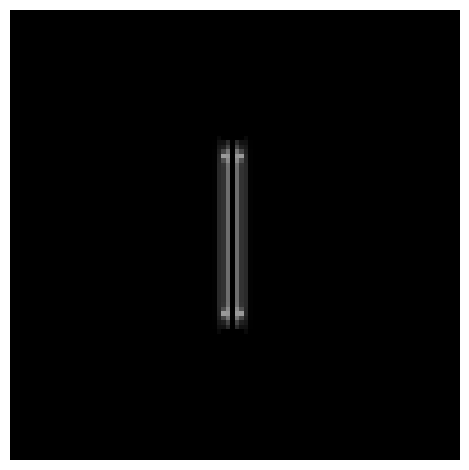

In [381]:
Utils.plot_gs(v_C[:,:,1])

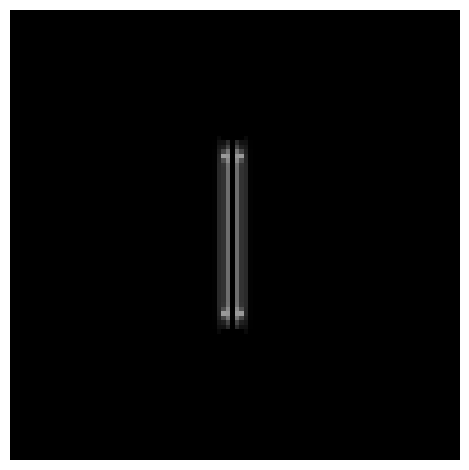

In [382]:
Utils.plot_gs(nnn[:,:,1])

In [385]:
function fun_v_Cj!(v_C::AbstractArray, v_p::AbstractArray, v_m::AbstractArray, p::NamedTuple)
    V = similar(v_p)
    temp = similar(v_p)

    @. temp = exp(-1.0f0/8.0f0) * (max(v_p,0)-max(v_m,0))
    imfilter!(V, temp,  (centered(p.k_gauss_2),), p.filling)

    A = similar(v_C)
#     allocate B to v_C
    @inbounds begin
    for k in 1:p.K
        a = @view A[:,:,k]
        b = @view v_C[:,:,k]
        imfilter!(a, V, (centered(p.k_C_d[:,:,k]),), p.filling)
        imfilter!(b, V, (centered(p.k_C_b[:,:,k]),), p.filling)
    end
    end
    @. v_C = p.γ * (max(A - abs(v_C), 0) + max(- A - abs(v_C), 0))
end

fun_v_Cj! (generic function with 1 method)

In [414]:
function fun_v_Ck!(v_C::AbstractArray, v_p::AbstractArray, v_m::AbstractArray, p::NamedTuple)
    V = similar(v_p)
    temp = similar(v_p)

    @. temp = exp(-1.0f0/8.0f0) * (max(v_p,0)-max(v_m,0))
    imfilter!(V, temp,  (centered(p.k_gauss_2),), p.filling)

    A = similar(v_C)
#     allocate B to v_C
    @inbounds begin
    for k in 1:p.K
        a = @view A[:,:,k]
        b = @view v_C[:,:,k]
        imfilter!(a, V, (centered(p.k_C_d[:,:,k]),), p.filling)
        imfilter!(b, V, (centered(p.k_C_b[:,:,k]),), p.filling)
    end
    end
    @. v_C = p.γ * (max(A - abs(v_C), 0) + max(- A - abs(v_C), 0))
    return nothing
end

fun_v_Ck! (generic function with 1 method)

In [409]:
@benchmark fun_v_Cj!(v_C, p.r, .-p.r, p) 

BenchmarkTools.Trial: 
  memory estimate:  666.67 KiB
  allocs estimate:  88
  --------------
  minimum time:     1.613 ms (0.00% GC)
  median time:      1.910 ms (0.00% GC)
  mean time:        2.088 ms (3.76% GC)
  maximum time:     41.405 ms (95.55% GC)
  --------------
  samples:          2385
  evals/sample:     1

In [415]:
@benchmark fun_v_Ck!(v_C, p.r, .-p.r, p) 

BenchmarkTools.Trial: 
  memory estimate:  666.67 KiB
  allocs estimate:  88
  --------------
  minimum time:     1.624 ms (0.00% GC)
  median time:      1.910 ms (0.00% GC)
  mean time:        2.085 ms (3.64% GC)
  maximum time:     39.765 ms (95.56% GC)
  --------------
  samples:          2388
  evals/sample:     1

In [411]:
fun_v_Cj!(v_C, p.r, .-p.r, p) 
@test nnn ≈ v_C
@benchmark fun_v_C_(p.r, .-p.r, p) 

BenchmarkTools.Trial: 
  memory estimate:  849.80 KiB
  allocs estimate:  104
  --------------
  minimum time:     1.404 ms (0.00% GC)
  median time:      1.625 ms (0.00% GC)
  mean time:        1.873 ms (5.84% GC)
  maximum time:     40.026 ms (96.00% GC)
  --------------
  samples:          2653
  evals/sample:     1

In [379]:
v_C = reshape(zeros(100,200),100, 100, 2)
v_Ca = copy(v_C)
nnn = fun_v_C_(p.r, .-p.r, p);

In [292]:
ee = exp(-1/8)

0.8824969025845955

In [293]:
typeof(ee)

Float64

In [231]:
@benchmark v_CA = fun_v_C_(p.r, .-p.r, p) 

BenchmarkTools.Trial: 
  memory estimate:  1.49 MiB
  allocs estimate:  104
  --------------
  minimum time:     1.597 ms (0.00% GC)
  median time:      2.159 ms (0.00% GC)
  mean time:        2.467 ms (7.21% GC)
  maximum time:     36.396 ms (94.39% GC)
  --------------
  samples:          2017
  evals/sample:     1

In [378]:
function fun_v_C_(v_p::AbstractArray, v_m::AbstractArray, p::NamedTuple)
    V = exp(-1.0f0/8.0f0) .* (imfilter((max.(v_p,0).-max.(v_m,0)), (centered(p.k_gauss_2),), p.filling))

    A = reshape(Array{eltype(V)}(undef, size(V)[1], size(V)[2]*p.K),size(V)[1],size(V)[2],p.K)
    B = copy(A)

    for k in 1:p.K
        A[:,:,k] = imfilter(V, (centered(p.k_C_d[:,:,k]),), p.filling)
        B[:,:,k] = abs.(imfilter(V, (centered(p.k_C_b[:,:,k]),), p.filling))
    end

    return p.γ .* (max.(A .- B, 0) .+ max.(.- A .- B, 0))
end

fun_v_C_ (generic function with 1 method)

In [257]:
v_p = p.r
v_m = .- p.r;

In [233]:
 V = similar(v_p)

100×100 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [297]:
temp = similar(v_p)
Va = similar(v_p)
    @. temp = max(v_p,0)-max(v_m,0)
imfilter!(Va, temp, (centered(p.k_gauss_2),), p.filling);
# @. Va = Va * exp(-1/8) 

In [298]:
V = (imfilter((max.(v_p,0).-max.(v_m,0)), (centered(p.k_gauss_2),), p.filling));

In [299]:
@test V==Va

Test Passed

In [300]:
V = V .* ee;
@. Va = Va * ee;

In [301]:
@test V==Va

Test Failed at In[301]:1
  Expression: V == Va
   Evaluated: [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0] == Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]


Test.FallbackTestSetException: There was an error during testing

In [313]:
aa = [1.0,2.0]
# ab = [0.0,0.0]
@. aa =  ee * aa;
aa

2-element Array{Float64,1}:
 0.8824969025845955
 1.764993805169191

In [303]:
aa = [1,2] .* ee;

In [304]:
aa

2-element Array{Float64,1}:
 0.8824969025845955
 1.764993805169191

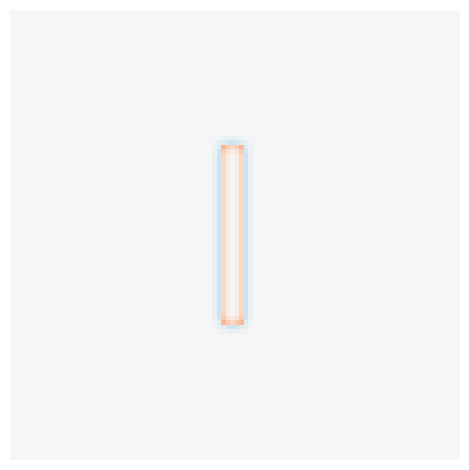

In [250]:
Utils.plot_rb(V)

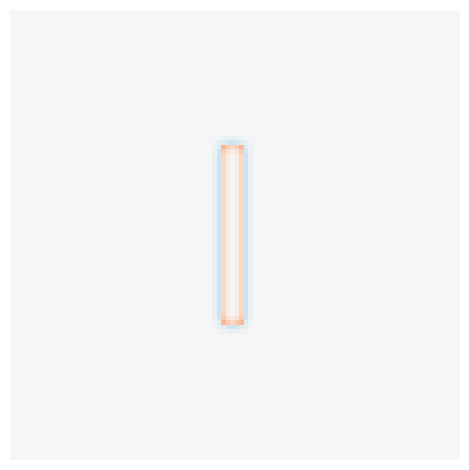

In [251]:
Utils.plot_rb(V)

In [259]:
V = V .*2;
@. Va = Va * exp(-1/8) 

100×100 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [253]:
Vb = 2 .* ones(10,10)
@. Vb = Vb * exp(-1/8) 

10×10 Array{Float64,2}:
 1.76499  1.76499  1.76499  1.76499  …  1.76499  1.76499  1.76499  1.76499
 1.76499  1.76499  1.76499  1.76499     1.76499  1.76499  1.76499  1.76499
 1.76499  1.76499  1.76499  1.76499     1.76499  1.76499  1.76499  1.76499
 1.76499  1.76499  1.76499  1.76499     1.76499  1.76499  1.76499  1.76499
 1.76499  1.76499  1.76499  1.76499     1.76499  1.76499  1.76499  1.76499
 1.76499  1.76499  1.76499  1.76499  …  1.76499  1.76499  1.76499  1.76499
 1.76499  1.76499  1.76499  1.76499     1.76499  1.76499  1.76499  1.76499
 1.76499  1.76499  1.76499  1.76499     1.76499  1.76499  1.76499  1.76499
 1.76499  1.76499  1.76499  1.76499     1.76499  1.76499  1.76499  1.76499
 1.76499  1.76499  1.76499  1.76499     1.76499  1.76499  1.76499  1.76499

In [254]:
Vc = 2 .* ones(10,10)
Vc = Vc .* exp(-1/8) 

10×10 Array{Float64,2}:
 1.76499  1.76499  1.76499  1.76499  …  1.76499  1.76499  1.76499  1.76499
 1.76499  1.76499  1.76499  1.76499     1.76499  1.76499  1.76499  1.76499
 1.76499  1.76499  1.76499  1.76499     1.76499  1.76499  1.76499  1.76499
 1.76499  1.76499  1.76499  1.76499     1.76499  1.76499  1.76499  1.76499
 1.76499  1.76499  1.76499  1.76499     1.76499  1.76499  1.76499  1.76499
 1.76499  1.76499  1.76499  1.76499  …  1.76499  1.76499  1.76499  1.76499
 1.76499  1.76499  1.76499  1.76499     1.76499  1.76499  1.76499  1.76499
 1.76499  1.76499  1.76499  1.76499     1.76499  1.76499  1.76499  1.76499
 1.76499  1.76499  1.76499  1.76499     1.76499  1.76499  1.76499  1.76499
 1.76499  1.76499  1.76499  1.76499     1.76499  1.76499  1.76499  1.76499

In [255]:
@test Va ==Vc

Test Passed

In [391]:
function fun_dx_V1_(x::AbstractArray, C::AbstractArray, z::AbstractArray, x_v2::AbstractArray, p::NamedTuple)
    return p.δ_c .* (-x .+
            ((1 .- x) .*
                ((p.α*C) .+ (p.ϕ .* max.(z .- p.Γ,0)) .+ (p.V_21 .* x_v2) .+ p.att)))
end

fun_dx_V1_ (generic function with 1 method)

In [392]:
function fun_dx_V1!(dx::AbstractArray, x::AbstractArray, C::AbstractArray, z::AbstractArray, x_v2::AbstractArray, p::NamedTuple)
    @. dx = p.δ_c * (-x +
            ((1.0f0 - x) *
                ((p.α*C) + (p.ϕ * max(z - p.Γ,0)) .+ (p.V_21 * x_v2) + p.att)))
end

fun_dx_V1! (generic function with 1 method)

In [402]:
function fun_dx_V1a!(dx::AbstractArray, x::AbstractArray, C::AbstractArray, z::AbstractArray, x_v2::AbstractArray, p::NamedTuple)
    @. dx = p.δ_c * (-x +
            ((1.0f0 - x) *
                ((p.α*C) + (p.ϕ * max(z - p.Γ,0)) .+ (p.V_21 * x_v2) + p.att)))
    return nothing
end

fun_dx_V1a! (generic function with 1 method)

In [393]:
dx = reshape(zeros(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K)
x = reshape(zeros(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K)
x[:,:,1] = p.r
x[:,:,2] = .-p.r
C = 2 .* reshape(ones(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K)
z = reshape(zeros(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K)

fun_dx_V1!(dx, x, C, z, p.x_V2, p) 

100×100×2 Array{Float64,3}:
[:, :, 1] =
 0.25  0.25  0.25  0.25  0.25  0.25  …  0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25  …  0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25  …  0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.25  0.25  0.25
 0.25  0.25  0.25  0.25  0.25  0.25     0.25  0.25  0.25  0.

In [394]:
@test fun_dx_V1!(dx, x, C, z, p.x_V2, p)  == fun_dx_V1_(x, C, z, p.x_V2, p) 

Test Passed

In [404]:
@benchmark fun_dx_V1!(dx, x, C, z, p.x_V2, p)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     128.386 μs (0.00% GC)
  median time:      142.670 μs (0.00% GC)
  mean time:        153.301 μs (0.00% GC)
  maximum time:     1.855 ms (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [405]:
@benchmark fun_dx_V1a!(dx, x, C, z, p.x_V2, p)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     126.456 μs (0.00% GC)
  median time:      140.425 μs (0.00% GC)
  mean time:        147.448 μs (0.00% GC)
  maximum time:     666.735 μs (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [399]:
@benchmark dx = fun_dx_V1_(x, C, z, p.x_V2, p) 

BenchmarkTools.Trial: 
  memory estimate:  468.98 KiB
  allocs estimate:  6
  --------------
  minimum time:     165.676 μs (0.00% GC)
  median time:      555.254 μs (0.00% GC)
  mean time:        683.240 μs (10.23% GC)
  maximum time:     48.555 ms (98.73% GC)
  --------------
  samples:          7194
  evals/sample:     1

In [66]:
function fun_dy_(y::AbstractArray, C::AbstractArray, x::AbstractArray, m::AbstractArray, p::NamedTuple)
    return  p.δ_c .* (   .-y .+
            ((1 .- y) .* (C .+ (p.η_p .* x))) .-
            ((1 .+ y) .* fun_f_(m .* func_filter_W_(m, p.k_W_p, p), p)))
end

fun_dy_ (generic function with 1 method)

In [67]:
function fun_dy!(dy::AbstractArray, y::AbstractArray, C::AbstractArray, x::AbstractArray, m::AbstractArray, p::NamedTuple)
    func_filter_W!(dy, m, p.k_W_p, p)
    @. dy = m * dy
    fun_f!(dy, dy, p)
    @. dy = p.δ_c * (   -y +
            ((1 - y) * (C + (p.η_p * x))) -
            ((1 + y) * dy))
    return nothing
end

fun_dy! (generic function with 1 method)

In [68]:
dy = reshape(zeros(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
y = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
C = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
x = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
m = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
fun_dy!(dy, y, C, x, m, p) 
@test dy  == fun_dy_(y, C, x, m, p)  

Test Passed

In [71]:
@benchmark dy = fun_dy_(y, C, x, m, p) 

BenchmarkTools.Trial: 
  memory estimate:  5.88 MiB
  allocs estimate:  1012
  --------------
  minimum time:     5.641 ms (0.00% GC)
  median time:      7.990 ms (0.00% GC)
  mean time:        9.174 ms (9.95% GC)
  maximum time:     27.272 ms (51.15% GC)
  --------------
  samples:          544
  evals/sample:     1

In [72]:
@benchmark fun_dy!(dy, y, C, x, m, p) 

BenchmarkTools.Trial: 
  memory estimate:  4.51 MiB
  allocs estimate:  986
  --------------
  minimum time:     5.478 ms (0.00% GC)
  median time:      7.159 ms (0.00% GC)
  mean time:        8.224 ms (8.99% GC)
  maximum time:     26.204 ms (76.01% GC)
  --------------
  samples:          607
  evals/sample:     1

In [ ]:
function fun_F_(value::Real, p::NamedTuple)
    max.(value - p.Γ, 0)
end

In [ ]:
function fun_F!(F_out::AbstractArray, value::Real, p::NamedTuple)
    max.(value - p.Γ, 0)
    return nothing
end

In [ ]:
F = reshape(zeros(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
fun_F!(F, v, p) 
@test F  == fun_F_(v, p)  

In [ ]:
@benchmark F = fun_F_(v, p) 

In [ ]:
@benchmark fun_F!(F, v, p) 

In [ ]:
function fun_F_willimson(value::Real, p::NamedTuple)
    value < p.Γ ? zero(value) : value
end

In [ ]:
function fun_F_willimson!(F_out::AbstractArray, value::Real, p::NamedTuple)
    value < p.Γ ? zero(value) : value
    return nothing
end

In [ ]:
F = reshape(zeros(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
fun_F_willimson!(F, v, p) 
@test F = fun_F_willimson(v, p)

In [ ]:
@benchmark F = fun_F_willimson(v, p) 

In [ ]:
@benchmark fun_F_willimson!(F, v, p) 

In [44]:
function fun_f_(x::AbstractArray, p::NamedTuple)
    return (p.μ .* x .^p.n) ./ (p.ν^p.n .+ x.^p.n)
end

fun_f_ (generic function with 1 method)

In [40]:
function fun_f!(f_out::AbstractArray, x::AbstractArray, p::NamedTuple)
    @. f_out = (p.μ * x^p.n) / (p.ν^p.n + x^p.n)
    return nothing
end

fun_f! (generic function with 1 method)

In [7]:
f = reshape(zeros(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
x = reshape(zeros(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
fun_f!(f, x, p) 
@test f  == fun_f_(x, p)  

Test Passed

In [9]:
@benchmark f = fun_f_(x, p) 

BenchmarkTools.Trial: 
  memory estimate:  156.33 KiB
  allocs estimate:  2
  --------------
  minimum time:     372.173 μs (0.00% GC)
  median time:      526.582 μs (0.00% GC)
  mean time:        580.154 μs (4.01% GC)
  maximum time:     15.840 ms (96.41% GC)
  --------------
  samples:          8514
  evals/sample:     1

In [10]:
@benchmark fun_f!(f, x, p) 

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     358.888 μs (0.00% GC)
  median time:      406.471 μs (0.00% GC)
  mean time:        461.850 μs (0.00% GC)
  maximum time:     6.263 ms (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [49]:
function func_filter_W_(img::AbstractArray, W::AbstractArray, p::NamedTuple)
    out = copy(img)
    for k ∈ 1:p.K
#     todo fix W
        out[:,:,k] = imfilter(img[:,:,k], (centered(W[:,:,k,k]),), p.filling)
        for l ∈ 1:p.K
            if l ≠ k
                out[:,:,k] += imfilter(img[:,:,l], (centered(W[:,:,k,l]),), p.filling)
            end
        end
    end
    return out
end

func_filter_W_ (generic function with 1 method)

In [30]:
function func_filter_W!(W_out::AbstractArray, img::AbstractArray, W::AbstractArray, p::NamedTuple)
    temp_k = similar(W_out[:,:,1]) 
    @inbounds begin
        for k ∈ 1:p.K
#     todo fix W
            img_k = @view img[:,:,k]
            out_k = @view W_out[:,:,k]
            imfilter!(out_k, img_k, (centered(W[:,:,k,k]),), p.filling)
            for l ∈ 1:p.K
                if l ≠ k
                    img_l = @view img[:,:,l]
                    imfilter!(temp_k, img_l, (centered(W[:,:,k,l]),), p.filling)
                    @. out_k += temp_k
                end
            end
        end
    end
    return nothing 
end

func_filter_W! (generic function with 1 method)

In [31]:
m = reshape(ones(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
W_out = reshape(zeros(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
func_filter_W!(W_out, m, p.k_W_p, p) 

@test W_out  == func_filter_W_(m, p.k_W_p, p) 

Test Passed

In [32]:
@benchmark W_out = func_filter_W_(m, p.k_W_p, p) 

BenchmarkTools.Trial: 
  memory estimate:  5.42 MiB
  allocs estimate:  962
  --------------
  minimum time:     3.410 ms (0.00% GC)
  median time:      5.043 ms (0.00% GC)
  mean time:        6.123 ms (13.64% GC)
  maximum time:     25.769 ms (75.39% GC)
  --------------
  samples:          815
  evals/sample:     1

In [33]:
@benchmark func_filter_W!(W_out, m, p.k_W_p, p)

BenchmarkTools.Trial: 
  memory estimate:  4.51 MiB
  allocs estimate:  942
  --------------
  minimum time:     3.257 ms (0.00% GC)
  median time:      4.728 ms (0.00% GC)
  mean time:        5.660 ms (12.39% GC)
  maximum time:     24.947 ms (79.06% GC)
  --------------
  samples:          882
  evals/sample:     1

In [50]:
function fun_dm(m::AbstractArray, x::AbstractArray, p::NamedTuple)
    return p.δ_m .* (  -m .+
                     (p.η_m .* x) .-
                     (m .* fun_f_(func_filter_W_(m, p.k_W_m, p), p)))
end

fun_dm (generic function with 1 method)

In [51]:
function fun_dm!(dm::AbstractArray, m::AbstractArray, x::AbstractArray, p::NamedTuple)
    func_filter_W!(dm, m, p.k_W_m, p)
    fun_f!(dm, dm, p)
    @. dm = p.δ_m * (  -m +
                     (p.η_m * x) -
                     (m * dm))
    return nothing
end

fun_dm! (generic function with 1 method)

In [52]:
dm = reshape(zeros(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
m = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
x = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
fun_dm!(dm, m, x, p) 
@test dm  == fun_dm(m, x, p)  

Test Passed

In [56]:
@benchmark dm = fun_dm(m, x, p)

BenchmarkTools.Trial: 
  memory estimate:  5.88 MiB
  allocs estimate:  968
  --------------
  minimum time:     5.606 ms (0.00% GC)
  median time:      7.276 ms (0.00% GC)
  mean time:        8.485 ms (10.64% GC)
  maximum time:     29.464 ms (64.23% GC)
  --------------
  samples:          589
  evals/sample:     1

In [57]:
@benchmark fun_dm!(dm, m, x, p)

BenchmarkTools.Trial: 
  memory estimate:  4.51 MiB
  allocs estimate:  942
  --------------
  minimum time:     5.203 ms (0.00% GC)
  median time:      6.569 ms (0.00% GC)
  mean time:        7.557 ms (9.00% GC)
  maximum time:     27.119 ms (75.25% GC)
  --------------
  samples:          659
  evals/sample:     1

In [96]:
function fun_dz_(z::AbstractArray,  H_z::AbstractArray, s::AbstractArray, p::NamedTuple)
    return p.δ_z .*   (-z .+
                    ((1 .- z) .*
                        ((p.λ .* max.(y,0)) .+ H_z .+ (p.a_23_ex .* p.att))) .-
                    ((z .+ p.ψ) .* (imfilter(s, (centered(p.k_T_p),), p.filling))))
end

fun_dz_ (generic function with 1 method)

In [97]:
function fun_dz!(dz::AbstractArray, z::AbstractArray,  H_z::AbstractArray, s::AbstractArray, p::NamedTuple)
    imfilter!(dz, s, (centered(p.k_T_p),), p.filling)
    @. dz = p.δ_z *   (-z +
                    ((1 - z) *
                        ((p.λ * max(y,0)) + H_z + (p.a_23_ex * p.att))) -
                    ((z + p.ψ) * dz))
    return nothing
end

fun_dz! (generic function with 2 methods)

In [98]:
dz = reshape(zeros(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
z = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
y = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
H_z = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
s = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
fun_dz!(dz, z, H_z, s, p) 
@test dz  == fun_dz_(z, H_z, s, p)   

Test Passed

In [99]:
@benchmark dz = fun_dz_(z, H_z, s, p)

BenchmarkTools.Trial: 
  memory estimate:  707.00 KiB
  allocs estimate:  75
  --------------
  minimum time:     454.763 μs (0.00% GC)
  median time:      933.414 μs (0.00% GC)
  mean time:        1.077 ms (9.61% GC)
  maximum time:     20.579 ms (96.45% GC)
  --------------
  samples:          4614
  evals/sample:     1

In [100]:
@benchmark fun_dz!(dz, z, H_z, s, p)

BenchmarkTools.Trial: 
  memory estimate:  237.98 KiB
  allocs estimate:  69
  --------------
  minimum time:     434.597 μs (0.00% GC)
  median time:      601.746 μs (0.00% GC)
  mean time:        672.153 μs (4.82% GC)
  maximum time:     18.346 ms (95.78% GC)
  --------------
  samples:          7386
  evals/sample:     1

In [102]:
function fun_ds_(s::AbstractArray, H_z::AbstractArray, p::NamedTuple)
    return p.δ_s .*   ( -s .+
                    H_z .+ (p.a_23_in .* p.att) .-
                    (s .* imfilter(s, (centered(p.k_T_m),), p.filling)))
end

fun_ds_ (generic function with 1 method)

In [103]:
function fun_ds!(ds::AbstractArray, s::AbstractArray, H_z::AbstractArray, p::NamedTuple)
    imfilter!(ds, s, (centered(p.k_T_m),), p.filling)
    @. ds = p.δ_s *   ( -s +
                    H_z + (p.a_23_in * p.att) -
                    (s * ds))
    return nothing
end

fun_ds! (generic function with 1 method)

In [105]:
ds = reshape(zeros(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
H_z = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
s = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
fun_ds!(ds, s, H_z, p) 
@test ds  == fun_ds_(s, H_z, p) 

Test Passed

In [107]:
@benchmark ds = fun_ds_(s, H_z, p) 

BenchmarkTools.Trial: 
  memory estimate:  705.66 KiB
  allocs estimate:  22
  --------------
  minimum time:     345.792 μs (0.00% GC)
  median time:      872.625 μs (0.00% GC)
  mean time:        1.076 ms (11.26% GC)
  maximum time:     27.449 ms (95.75% GC)
  --------------
  samples:          4596
  evals/sample:     1

In [108]:
@benchmark fun_ds!(ds, s, H_z, p)

BenchmarkTools.Trial: 
  memory estimate:  236.67 KiB
  allocs estimate:  16
  --------------
  minimum time:     325.716 μs (0.00% GC)
  median time:      516.816 μs (0.00% GC)
  mean time:        590.965 μs (6.49% GC)
  maximum time:     21.330 ms (97.06% GC)
  --------------
  samples:          8363
  evals/sample:     1

In [15]:
function fun_H_z_(z::AbstractArray, p::NamedTuple)
    H_z_out = copy(z)
    for k ∈ 1:p.K
        H_z_out[:,:,k] = imfilter((max.(z[:,:,k] .- p.Γ,0)), (centered(p.k_H[:,:,k]),), p.filling)
        end
    return H_z_out
end

fun_H_z_ (generic function with 1 method)

In [16]:
function fun_H_z!(H_z::AbstractArray, z::AbstractArray, p::NamedTuple)
    for k ∈ 1:p.K
        H_z_k = @view H_z[:,:,k]
        z_k = @view z[:,:,k]
        imfilter!(H_z_k, (max.(z_k .- p.Γ,0)), (centered(p.k_H[:,:,k]),), p.filling)
        end
    return nothing
end


fun_H_z! (generic function with 1 method)

In [17]:
function fun_H_za!(H_z::AbstractArray, z::AbstractArray, p::NamedTuple)
    temp = similar(z)
    @. temp = max(z - p.Γ, 0)
    @inbounds begin
        for k ∈ 1:p.K
            H_z_k = @view H_z[:,:,k]
            temp_k = @view temp[:,:,k]
            imfilter!(H_z_k, temp_k, (centered(p.k_H[:,:,k]),), p.filling)
        end
    end
    return nothing
end

fun_H_za! (generic function with 1 method)

In [21]:
H_z = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
z = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
z[:,:,1] = p.r
z[:,:,2] = .-p.r
fun_H_za!(H_z, z, p) 
@test H_z  == fun_H_z_(z, p)  

Test Passed

In [22]:
@benchmark H_z = fun_H_z_(z, p)

BenchmarkTools.Trial: 
  memory estimate:  2.79 MiB
  allocs estimate:  482
  --------------
  minimum time:     1.176 ms (0.00% GC)
  median time:      2.506 ms (0.00% GC)
  mean time:        3.073 ms (13.26% GC)
  maximum time:     25.457 ms (88.78% GC)
  --------------
  samples:          1622
  evals/sample:     1

In [23]:
@benchmark fun_H_z!(H_z, z, p)  

BenchmarkTools.Trial: 
  memory estimate:  2.33 MiB
  allocs estimate:  476
  --------------
  minimum time:     1.186 ms (0.00% GC)
  median time:      2.410 ms (0.00% GC)
  mean time:        2.876 ms (12.33% GC)
  maximum time:     27.404 ms (86.42% GC)
  --------------
  samples:          1733
  evals/sample:     1

In [24]:
@benchmark fun_H_za!(H_z, z, p)  

BenchmarkTools.Trial: 
  memory estimate:  2.33 MiB
  allocs estimate:  472
  --------------
  minimum time:     1.164 ms (0.00% GC)
  median time:      2.450 ms (0.00% GC)
  mean time:        2.937 ms (12.11% GC)
  maximum time:     24.644 ms (84.95% GC)
  --------------
  samples:          1698
  evals/sample:     1

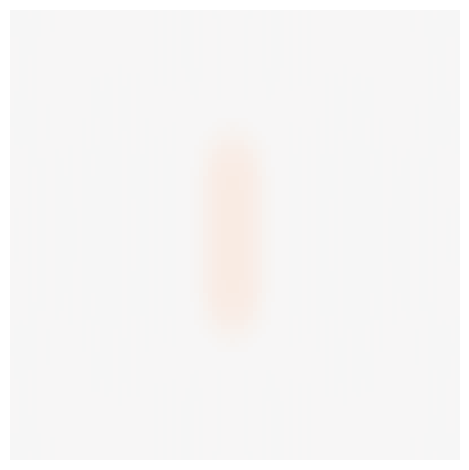

In [26]:
Utils.plot_rb(H_z[:,:,2])

In [27]:
temp = similar(z)
    @. temp = max(z - p.Γ, 0)

100×100×2 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

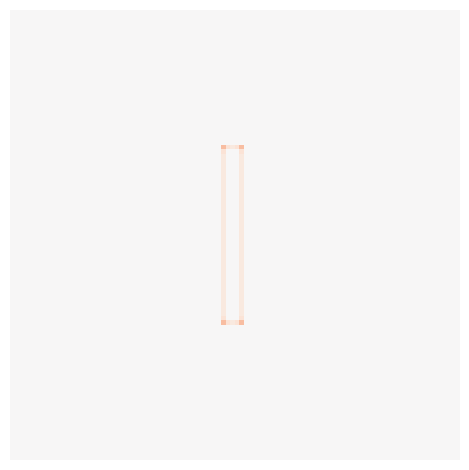

In [29]:
Utils.plot_rb(temp[:,:,1])

In [ ]:
    @inbounds begin
        for k ∈ 1:p.K
            H_z_k = @view H_z[:,:,k]
            temp_k = @view temp[:,:,k]
            imfilter!(H_z_k, temp_k, (centered(p.k_H[:,:,k]),), p.filling)
        end
    end

In [30]:
#     @inbounds begin
#         for k ∈ 1:p.K
            H_z_k = @view H_z[:,:,1]
            temp_k = @view temp[:,:,1]
            imfilter!(H_z_k, temp_k, (centered(p.k_H[:,:,1]),), p.filling)
#         end
#     end

100×100 view(::Array{Float64,3}, :, :, 1) with eltype Float64:
 -2.85399e-10   4.51862e-11  -1.29036e-11  …  -2.85399e-10  5.15803e-10
 -2.58867e-10  -2.66429e-12  -3.2775e-11      -2.58867e-10  5.7615e-10
 -2.12411e-10  -3.10613e-11  -2.35084e-11     -2.12411e-10  6.17551e-10
 -1.47693e-10  -3.97482e-11   6.32262e-12     -1.47693e-10  6.3373e-10
 -6.74024e-11  -3.03064e-11   4.7673e-11      -6.74022e-11  6.26691e-10
  2.23948e-11  -1.05301e-11   9.27782e-11  …   2.2395e-11   6.01728e-10
  1.17754e-10   1.31822e-11   1.40784e-10      1.17754e-10  5.70223e-10
  2.11034e-10   3.2066e-11    1.92895e-10      2.11035e-10  5.38845e-10
  2.95981e-10   3.90704e-11   2.51483e-10      2.95981e-10  5.09586e-10
  3.66432e-10   2.92399e-11   3.14391e-10      3.66432e-10  4.81806e-10
  4.17775e-10   3.63339e-13   3.74307e-10  …   4.17775e-10  4.53035e-10
  4.4952e-10   -4.56758e-11   4.20337e-10      4.4952e-10   4.26326e-10
  4.66207e-10  -1.00277e-10   4.43433e-10      4.66208e-10  4.10394e-10
  ⋮

In [136]:
function func_dx_v2(x_v2::AbstractArray, z_v2::AbstractArray, z::AbstractArray, p::NamedTuple)
    return p.δ_c .*   (  -x_v2 .+
                    ((1 .- x_v2) .*
                        ((p.v12_6 .* max.(z .- p.Γ, 0)) + (p.ϕ .* max.(z_v2 .- p.Γ, 0)) .+ p.att)))
end

func_dx_v2 (generic function with 1 method)

In [137]:
function func_dx_v2!(dx::AbstractArray, x_v2::AbstractArray, z_v2::AbstractArray, z::AbstractArray, p::NamedTuple)
    @. dx = p.δ_c *   (  -x_v2 +
                    ((1 - x_v2) *
                        ((p.v12_6 * max(z - p.Γ, 0)) + (p.ϕ * max(z_v2 - p.Γ, 0)) + p.att)))
    return nothing
end

func_dx_v2! (generic function with 1 method)

In [139]:
dx = reshape(zeros(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
x_v2 = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
z_v2 = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
z = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
func_dx_v2!(dx, x_v2, z_v2, z, p)
@test dx  == func_dx_v2(x_v2, z_v2, z, p)

Test Passed

In [140]:
@benchmark dx = func_dx_v2(x_v2, z_v2, z, p)

BenchmarkTools.Trial: 
  memory estimate:  781.64 KiB
  allocs estimate:  10
  --------------
  minimum time:     105.230 μs (0.00% GC)
  median time:      619.005 μs (0.00% GC)
  mean time:        776.650 μs (16.55% GC)
  maximum time:     33.345 ms (97.66% GC)
  --------------
  samples:          6366
  evals/sample:     1

In [141]:
@benchmark func_dx_v2!(dx, x_v2, z_v2, z, p)

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     189.238 μs (0.00% GC)
  median time:      215.553 μs (0.00% GC)
  mean time:        228.634 μs (0.00% GC)
  maximum time:     672.521 μs (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [142]:
function fun_dy_v2_(y_v2::AbstractArray, z::AbstractArray, x_v2::AbstractArray, m_v2::AbstractArray, p::NamedTuple)
    return δ_c .*   (-y_v2 .+
                    ((1 .- y_v2) .* ((v12_4 .* max.(z .- p.Γ, 0)) .+ (p.η_p .* x_v2))) .-
                    ((1 .+ y_v2) .* fun_f.(imfilter(m_v2, (centered(p.k_W_p),), p.filling)), p.μ, p.ν, p.n))
end

fun_dy_v2_ (generic function with 1 method)

In [152]:
function fun_dy_v2!(dy::AbstractArray, y_v2::AbstractArray, z::AbstractArray, x_v2::AbstractArray, m_v2::AbstractArray, p::NamedTuple)
    func_filter_W!(dy, m_v2, p.k_W_p, p)
    fun_f!(dy, dy, p)
    @. dy = p.δ_c *   (-y_v2 +
                    ((1.0f0 - y_v2) * ((p.v12_4 * max(z - p.Γ, 0)) + (p.η_p * x_v2))) -
                    ((1.0f0 + y_v2) * dy))
    return nothing
end

fun_dy_v2! (generic function with 1 method)

In [145]:
dy = reshape(zeros(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
y_v2 = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
x_v2 = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
z = reshape(rand(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
m_v2 = reshape(zeros(p.dim_i, p.dim_j*p.K), p.dim_i, p.dim_j, p.K) 
fun_dy_v2!(dy, y_v2, z, x_v2, m_v2, p) 
@test dy  == fun_dy_v2(y_v2, z, x_v2, m_v2, p) 

BoundsError: BoundsError: attempt to access ()
  at index [1]

In [ ]:
@benchmark dy = fun_dy_v2_(y_v2, z, x_v2, m_v2, p)

In [153]:
@benchmark fun_dy_v2!(dy, y_v2, z, x_v2, m_v2, p)  

BenchmarkTools.Trial: 
  memory estimate:  4.51 MiB
  allocs estimate:  998
  --------------
  minimum time:     3.902 ms (0.00% GC)
  median time:      5.377 ms (0.00% GC)
  mean time:        6.368 ms (12.00% GC)
  maximum time:     27.755 ms (72.00% GC)
  --------------
  samples:          785
  evals/sample:     1

In [7]:
tspan = (0.0f0, 100.0f0)

(0.0f0, 100.0f0)

In [35]:
u0 = reshape(zeros(p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2);

In [36]:
prob = ODEProblem(Laminart.f!, u0, tspan, p)

ODEProblem with uType Array{Float64,3} and tType Float32. In-place: true
timespan: (0.0f0, 100.0f0)
u0: [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

In [37]:
prob_ = ODEProblem(Laminartv1.f!, u0, tspan, p)

ODEProblem with uType Array{Float64,3} and tType Float32. In-place: true
timespan: (0.0f0, 100.0f0)
u0: [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

In [38]:
sol = solve(prob);

In [45]:
@benchmark sol = solve(prob)

BenchmarkTools.Trial: 
  memory estimate:  9.62 GiB
  allocs estimate:  1737706
  --------------
  minimum time:     23.692 s (36.13% GC)
  median time:      23.692 s (36.13% GC)
  mean time:        23.692 s (36.13% GC)
  maximum time:     23.692 s (36.13% GC)
  --------------
  samples:          1
  evals/sample:     1

In [42]:
@benchmark sol_ = solve(prob_)

BenchmarkTools.Trial: 
  memory estimate:  10.84 GiB
  allocs estimate:  1441554
  --------------
  minimum time:     21.623 s (36.74% GC)
  median time:      21.623 s (36.74% GC)
  mean time:        21.623 s (36.74% GC)
  maximum time:     21.623 s (36.74% GC)
  --------------
  samples:          1
  evals/sample:     1

In [21]:
sol_ = solve(prob_);

In [19]:
@test sol(100) ≈ sol_(100)

Test Failed at In[19]:1
  Expression: sol(100) ≈ sol_(100)
   Evaluated: [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[-5.921149675838944e-10 -5.960468575407023e-10 … -5.921150367003139e-10 -4.585954016177284e-10; -6.097631915134277e-10 -6.331612817533157e-10 … -6.097632698027013e-10 -4.669574203883315e-10; … ; -6.097632472251472e-10 -6.331612876485393e-10 … -6.097632820609842e-10 -4.669573899195297e-10; -5.92115028958893e-10 -5.960468568856907e-10 … -5.921150609236834e-10 -4.5859538093225374e-10]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0] ≈ [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 

Test.FallbackTestSetException: There was an error during testing

In [49]:
# @parameters t
@variables du[1:p.dim_i, 1:p.dim_j, 1:5*p.K+2] u[1:p.dim_i, 1:p.dim_j, 1:5*p.K+2] x_lgn[1:p.dim_i, 1:p.dim_j] C[1:p.dim_i, 1:p.dim_j, 1:p.K] H_z[1:p.dim_i, 1:p.dim_j, 1:p.K]; 

In [50]:
Laminart.f!(du,u,p,0.0)

UndefVarError: UndefVarError: x_lgn not defined

In [31]:
@parameters t 
@variables du[1:p.dim_i, 1:p.dim_j, 1:5*p.K+2](t) u[1:p.dim_i, 1:p.dim_j, 1:5*p.K+2](t) x_lgn[1:p.dim_i, 1:p.dim_j](t) C[1:p.dim_i, 1:p.dim_j, 1:p.K](t) H_z[1:p.dim_i, 1:p.dim_j, 1:p.K](t); 
Laminart.f!(du,u,p,0.0);
# u0 = reshape(zeros(p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2);
# # jac = sparse(ModelingToolkit.jacobian(vec(du),vec(u),simplify=false))

# # fjac = eval(ModelingToolkit.build_function(jac,u));
# # prob_jac = ODEProblem(ODEFunction(ff!,jac = (du,u,p,t) -> fjac(du,u), jac_prototype = similar(jac,Float64)),u0,(0.0,10.0))
# # sol = solve(prob_jac)

MethodError: MethodError: no method matching isnan(::Operation)
Closest candidates are:
  isnan(!Matched::BigFloat) at mpfr.jl:893
  isnan(!Matched::Missing) at missing.jl:100
  isnan(!Matched::Float16) at float.jl:537
  ...

In [39]:
# @parameters t 
@variables du[1:p.dim_i, 1:p.dim_j, 1:5*p.K+2] u[1:p.dim_i, 1:p.dim_j, 1:5*p.K+2] x_lgn[1:p.dim_i, 1:p.dim_j] C[1:p.dim_i, 1:p.dim_j, 1:p.K] H_z[1:p.dim_i, 1:p.dim_j, 1:p.K]; 
Laminart.f!(du,u,p,0.0);

MethodError: MethodError: no method matching isnan(::Operation)
Closest candidates are:
  isnan(!Matched::BigFloat) at mpfr.jl:893
  isnan(!Matched::Missing) at missing.jl:100
  isnan(!Matched::Float16) at float.jl:537
  ...

In [33]:
z

100×100×2 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

In [34]:
@view u[:, :, 3*p.K+1:4*p.K]

100×100×2 view(::Array{Operation,3}, :, :, 7:8) with eltype Operation:
[:, :, 1] =
   u₁ˏ₁ˏ₇    u₁ˏ₂ˏ₇    u₁ˏ₃ˏ₇    u₁ˏ₄ˏ₇  …    u₁ˏ₉₈ˏ₇    u₁ˏ₉₉ˏ₇    u₁ˏ₁₀₀ˏ₇
   u₂ˏ₁ˏ₇    u₂ˏ₂ˏ₇    u₂ˏ₃ˏ₇    u₂ˏ₄ˏ₇       u₂ˏ₉₈ˏ₇    u₂ˏ₉₉ˏ₇    u₂ˏ₁₀₀ˏ₇
   u₃ˏ₁ˏ₇    u₃ˏ₂ˏ₇    u₃ˏ₃ˏ₇    u₃ˏ₄ˏ₇       u₃ˏ₉₈ˏ₇    u₃ˏ₉₉ˏ₇    u₃ˏ₁₀₀ˏ₇
   u₄ˏ₁ˏ₇    u₄ˏ₂ˏ₇    u₄ˏ₃ˏ₇    u₄ˏ₄ˏ₇       u₄ˏ₉₈ˏ₇    u₄ˏ₉₉ˏ₇    u₄ˏ₁₀₀ˏ₇
   u₅ˏ₁ˏ₇    u₅ˏ₂ˏ₇    u₅ˏ₃ˏ₇    u₅ˏ₄ˏ₇       u₅ˏ₉₈ˏ₇    u₅ˏ₉₉ˏ₇    u₅ˏ₁₀₀ˏ₇
   u₆ˏ₁ˏ₇    u₆ˏ₂ˏ₇    u₆ˏ₃ˏ₇    u₆ˏ₄ˏ₇  …    u₆ˏ₉₈ˏ₇    u₆ˏ₉₉ˏ₇    u₆ˏ₁₀₀ˏ₇
   u₇ˏ₁ˏ₇    u₇ˏ₂ˏ₇    u₇ˏ₃ˏ₇    u₇ˏ₄ˏ₇       u₇ˏ₉₈ˏ₇    u₇ˏ₉₉ˏ₇    u₇ˏ₁₀₀ˏ₇
   u₈ˏ₁ˏ₇    u₈ˏ₂ˏ₇    u₈ˏ₃ˏ₇    u₈ˏ₄ˏ₇       u₈ˏ₉₈ˏ₇    u₈ˏ₉₉ˏ₇    u₈ˏ₁₀₀ˏ₇
   u₉ˏ₁ˏ₇    u₉ˏ₂ˏ₇    u₉ˏ₃ˏ₇    u₉ˏ₄ˏ₇       u₉ˏ₉₈ˏ₇    u₉ˏ₉₉ˏ₇    u₉ˏ₁₀₀ˏ₇
  u₁₀ˏ₁ˏ₇   u₁₀ˏ₂ˏ₇   u₁₀ˏ₃ˏ₇   u₁₀ˏ₄ˏ₇      u₁₀ˏ₉₈ˏ₇   u₁₀ˏ₉₉ˏ₇   u₁₀ˏ₁₀₀ˏ₇
  u₁₁ˏ₁ˏ₇   u₁₁ˏ₂ˏ₇   u₁₁ˏ₃ˏ₇   u₁₁ˏ₄ˏ₇  …   u₁₁ˏ₉₈ˏ₇   u₁₁ˏ₉₉ˏ₇   u₁₁ˏ₁₀₀ˏ₇
  u₁₂ˏ₁ˏ₇   u₁₂ˏ₂ˏ₇   u₁₂ˏ₃ˏ₇   u₁₂ˏ₄ˏ₇      u₁₂ˏ₉₈ˏ₇   u₁₂ˏ₉₉ˏ₇   u₁₂

In [35]:
@view du[:, :, 3*p.K+1:4*p.K]

100×100×2 view(::Array{Operation,3}, :, :, 7:8) with eltype Operation:
[:, :, 1] =
   du₁ˏ₁ˏ₇    du₁ˏ₂ˏ₇    du₁ˏ₃ˏ₇  …    du₁ˏ₉₈ˏ₇    du₁ˏ₉₉ˏ₇    du₁ˏ₁₀₀ˏ₇
   du₂ˏ₁ˏ₇    du₂ˏ₂ˏ₇    du₂ˏ₃ˏ₇       du₂ˏ₉₈ˏ₇    du₂ˏ₉₉ˏ₇    du₂ˏ₁₀₀ˏ₇
   du₃ˏ₁ˏ₇    du₃ˏ₂ˏ₇    du₃ˏ₃ˏ₇       du₃ˏ₉₈ˏ₇    du₃ˏ₉₉ˏ₇    du₃ˏ₁₀₀ˏ₇
   du₄ˏ₁ˏ₇    du₄ˏ₂ˏ₇    du₄ˏ₃ˏ₇       du₄ˏ₉₈ˏ₇    du₄ˏ₉₉ˏ₇    du₄ˏ₁₀₀ˏ₇
   du₅ˏ₁ˏ₇    du₅ˏ₂ˏ₇    du₅ˏ₃ˏ₇       du₅ˏ₉₈ˏ₇    du₅ˏ₉₉ˏ₇    du₅ˏ₁₀₀ˏ₇
   du₆ˏ₁ˏ₇    du₆ˏ₂ˏ₇    du₆ˏ₃ˏ₇  …    du₆ˏ₉₈ˏ₇    du₆ˏ₉₉ˏ₇    du₆ˏ₁₀₀ˏ₇
   du₇ˏ₁ˏ₇    du₇ˏ₂ˏ₇    du₇ˏ₃ˏ₇       du₇ˏ₉₈ˏ₇    du₇ˏ₉₉ˏ₇    du₇ˏ₁₀₀ˏ₇
   du₈ˏ₁ˏ₇    du₈ˏ₂ˏ₇    du₈ˏ₃ˏ₇       du₈ˏ₉₈ˏ₇    du₈ˏ₉₉ˏ₇    du₈ˏ₁₀₀ˏ₇
   du₉ˏ₁ˏ₇    du₉ˏ₂ˏ₇    du₉ˏ₃ˏ₇       du₉ˏ₉₈ˏ₇    du₉ˏ₉₉ˏ₇    du₉ˏ₁₀₀ˏ₇
  du₁₀ˏ₁ˏ₇   du₁₀ˏ₂ˏ₇   du₁₀ˏ₃ˏ₇      du₁₀ˏ₉₈ˏ₇   du₁₀ˏ₉₉ˏ₇   du₁₀ˏ₁₀₀ˏ₇
  du₁₁ˏ₁ˏ₇   du₁₁ˏ₂ˏ₇   du₁₁ˏ₃ˏ₇  …   du₁₁ˏ₉₈ˏ₇   du₁₁ˏ₉₉ˏ₇   du₁₁ˏ₁₀₀ˏ₇
  du₁₂ˏ₁ˏ₇   du₁₂ˏ₂ˏ₇   du₁₂ˏ₃ˏ₇      du₁₂ˏ₉₈ˏ₇   du₁₂ˏ₉₉ˏ₇   du₁₂ˏ₁₀₀ˏ₇
  du₁₃ˏ₁ˏ₇   du₁₃ˏ₂ˏ₇   du₁₃ˏ₃ˏ₇      du₁

In [14]:

@variables du[1:p.dim_i, 1:p.dim_j, 1:5*p.K+2] u[1:p.dim_i, 1:p.dim_j, 1:5*p.K+2] x_lgn[1:p.dim_i, 1:p.dim_j] C[1:p.dim_i, 1:p.dim_j, 1:p.K] H_z[1:p.dim_i, 1:p.dim_j, 1:p.K]; 
x = @view u[:, :, 1:p.K]
        y = @view u[:, :, p.K+1:2*p.K]
        m = @view u[:, :, 2*p.K+1:3*p.K]
        z = @view u[:, :, 3*p.K+1:4*p.K]
        s = @view u[:, :, 4*p.K+1:5*p.K]

#    C = @view u[:, :, 5*p.K+1:6*p.K]
#    H_z = @view u[:, :, 6*p.K+1:7*p.K]

        v_p = @view u[:, :, 5*p.K+1]
        v_m = @view u[:, :, 5*p.K+2]
#    x_lgn = @view u[:, :, 7*p.K+3]

        dx = @view du[:, :, 1:p.K]
        dy = @view du[:, :, p.K+1:2*p.K]
        dm = @view du[:, :, 2*p.K+1:3*p.K]
        dz = @view du[:, :, 3*p.K+1:4*p.K]
        ds = @view du[:, :, 4*p.K+1:5*p.K]

        dv_p = @view du[:, :, 5*p.K+1]
        dv_m = @view du[:, :, 5*p.K+2]

#         x_lgn = similar(v_p)
#         C = similar(x)
#         H_z = similar(x)
#         C = reshape(Array{eltype(u)}(undef, p.dim_i, p.dim_j*p.K),p.dim_i,p.dim_j, p.K)
#         C = reshape(zeros(p.dim_i, p.dim_j*p.K),p.dim_i,p.dim_j, p.K)

#         x_lgn = Array{eltype(u)}(undef, p.dim_i, p.dim_j)
#         C  = copy(u[:, :, 1:p.K])
#         H_z = copy(u[:, :, 1:p.K])

# x_lgn = zeros(p.dim_i, p.dim_j)
# H_z = reshape(zeros(p.dim_i, p.dim_j*p.K),p.dim_i,p.dim_j, p.K)
# C = reshape(zeros(p.dim_i, p.dim_j*p.K),p.dim_i,p.dim_j, p.K)

#         Laminart.fun_x_lgn!(x_lgn, x, p)
#         Laminart.fun_v_C!(C, v_p, v_m, p)
#         Laminart.fun_H_z!(H_z, z, p)

#         Laminart.fun_dv!(dv_p, v_p, p.r, x_lgn, p)
#         Laminart.fun_dv!(dv_m, v_m, .-p.r, x_lgn, p)
#         Laminart.fun_dx_v1!(dx, x, C, z, p.x_V2, p)
#         Laminart.fun_dy!(dy, y, C, x, m, p)
#         Laminart.fun_dm!(dm, m, x, p)
#         Laminart.fun_dz!(dz, z, y, H_z, s, p)
#         Laminart.fun_ds!(ds, s,  H_z, p)

100×100 view(::Array{Operation,3}, :, :, 12) with eltype Operation:
   du₁ˏ₁ˏ₁₂    du₁ˏ₂ˏ₁₂    du₁ˏ₃ˏ₁₂    du₁ˏ₄ˏ₁₂  …    du₁ˏ₉₉ˏ₁₂    du₁ˏ₁₀₀ˏ₁₂
   du₂ˏ₁ˏ₁₂    du₂ˏ₂ˏ₁₂    du₂ˏ₃ˏ₁₂    du₂ˏ₄ˏ₁₂       du₂ˏ₉₉ˏ₁₂    du₂ˏ₁₀₀ˏ₁₂
   du₃ˏ₁ˏ₁₂    du₃ˏ₂ˏ₁₂    du₃ˏ₃ˏ₁₂    du₃ˏ₄ˏ₁₂       du₃ˏ₉₉ˏ₁₂    du₃ˏ₁₀₀ˏ₁₂
   du₄ˏ₁ˏ₁₂    du₄ˏ₂ˏ₁₂    du₄ˏ₃ˏ₁₂    du₄ˏ₄ˏ₁₂       du₄ˏ₉₉ˏ₁₂    du₄ˏ₁₀₀ˏ₁₂
   du₅ˏ₁ˏ₁₂    du₅ˏ₂ˏ₁₂    du₅ˏ₃ˏ₁₂    du₅ˏ₄ˏ₁₂       du₅ˏ₉₉ˏ₁₂    du₅ˏ₁₀₀ˏ₁₂
   du₆ˏ₁ˏ₁₂    du₆ˏ₂ˏ₁₂    du₆ˏ₃ˏ₁₂    du₆ˏ₄ˏ₁₂  …    du₆ˏ₉₉ˏ₁₂    du₆ˏ₁₀₀ˏ₁₂
   du₇ˏ₁ˏ₁₂    du₇ˏ₂ˏ₁₂    du₇ˏ₃ˏ₁₂    du₇ˏ₄ˏ₁₂       du₇ˏ₉₉ˏ₁₂    du₇ˏ₁₀₀ˏ₁₂
   du₈ˏ₁ˏ₁₂    du₈ˏ₂ˏ₁₂    du₈ˏ₃ˏ₁₂    du₈ˏ₄ˏ₁₂       du₈ˏ₉₉ˏ₁₂    du₈ˏ₁₀₀ˏ₁₂
   du₉ˏ₁ˏ₁₂    du₉ˏ₂ˏ₁₂    du₉ˏ₃ˏ₁₂    du₉ˏ₄ˏ₁₂       du₉ˏ₉₉ˏ₁₂    du₉ˏ₁₀₀ˏ₁₂
  du₁₀ˏ₁ˏ₁₂   du₁₀ˏ₂ˏ₁₂   du₁₀ˏ₃ˏ₁₂   du₁₀ˏ₄ˏ₁₂      du₁₀ˏ₉₉ˏ₁₂   du₁₀ˏ₁₀₀ˏ₁₂
  du₁₁ˏ₁ˏ₁₂   du₁₁ˏ₂ˏ₁₂   du₁₁ˏ₃ˏ₁₂   du₁₁ˏ₄ˏ₁₂  …   du₁₁ˏ₉₉ˏ₁₂   du₁₁ˏ₁₀₀ˏ₁₂
  du₁₂ˏ₁ˏ₁₂   du₁₂ˏ₂ˏ₁₂   du₁₂ˏ₃ˏ₁₂   du₁₂ˏ₄ˏ₁₂      du₁₂ˏ₉₉ˏ₁₂   du₁₂ˏ₁₀₀

In [15]:
#     func_filter_W!(dm, m, p.k_W_m, p)
temp_k = similar(dm[:,:,1])
#     @inbounds begin
#         for k ∈ 1:p.K
#     todo fix W
l = 1
k = 1

img_k =  m[:,:,k]
            out_k = @view dm[:,:,k]
#             out_k = similar(dm[:,:,k])
            imfilter!(out_k, V, (centered(p.k_W_m[:,:,k,k]),), p.filling)
#             for l ∈ 1:p.K
#                 if l ≠ k
#                     img_l = @view img[:,:,l]
#                     imfilter!(temp_k, img_l, (centered(W[:,:,k,l]),), p.filling)
#                     @. out_k += temp_k
#                 end
#             end
#         end
#     end
#     return nothing
# end

UndefVarError: UndefVarError: V not defined

In [92]:
img_k[1,:]

100-element Array{Operation,1}:
   u₁ˏ₁ˏ₅
   u₁ˏ₂ˏ₅
   u₁ˏ₃ˏ₅
   u₁ˏ₄ˏ₅
   u₁ˏ₅ˏ₅
   u₁ˏ₆ˏ₅
   u₁ˏ₇ˏ₅
   u₁ˏ₈ˏ₅
   u₁ˏ₉ˏ₅
  u₁ˏ₁₀ˏ₅
  u₁ˏ₁₁ˏ₅
  u₁ˏ₁₂ˏ₅
  u₁ˏ₁₃ˏ₅
        ⋮
  u₁ˏ₈₉ˏ₅
  u₁ˏ₉₀ˏ₅
  u₁ˏ₉₁ˏ₅
  u₁ˏ₉₂ˏ₅
  u₁ˏ₉₃ˏ₅
  u₁ˏ₉₄ˏ₅
  u₁ˏ₉₅ˏ₅
  u₁ˏ₉₆ˏ₅
  u₁ˏ₉₇ˏ₅
  u₁ˏ₉₈ˏ₅
  u₁ˏ₉₉ˏ₅
 u₁ˏ₁₀₀ˏ₅

In [50]:
typeof(identity(0.0))

Float64

In [51]:
?identity

search: identity DiffEqIdentity SplitSDEFunction independent_variable



```
identity(x)
```

The identity function. Returns its argument.

# Examples

```jldoctest
julia> identity("Well, what did you expect?")
"Well, what did you expect?"
```


In [55]:
temp

100×100 Array{Operation,2}:
     0.882497 * (max(u₁ˏ₁ˏ₁₁, 0) - max(u₁ˏ₁ˏ₁₂, 0))  …      0.882497 * (max(u₁ˏ₁₀₀ˏ₁₁, 0) - max(u₁ˏ₁₀₀ˏ₁₂, 0))
     0.882497 * (max(u₂ˏ₁ˏ₁₁, 0) - max(u₂ˏ₁ˏ₁₂, 0))         0.882497 * (max(u₂ˏ₁₀₀ˏ₁₁, 0) - max(u₂ˏ₁₀₀ˏ₁₂, 0))
     0.882497 * (max(u₃ˏ₁ˏ₁₁, 0) - max(u₃ˏ₁ˏ₁₂, 0))         0.882497 * (max(u₃ˏ₁₀₀ˏ₁₁, 0) - max(u₃ˏ₁₀₀ˏ₁₂, 0))
     0.882497 * (max(u₄ˏ₁ˏ₁₁, 0) - max(u₄ˏ₁ˏ₁₂, 0))         0.882497 * (max(u₄ˏ₁₀₀ˏ₁₁, 0) - max(u₄ˏ₁₀₀ˏ₁₂, 0))
     0.882497 * (max(u₅ˏ₁ˏ₁₁, 0) - max(u₅ˏ₁ˏ₁₂, 0))         0.882497 * (max(u₅ˏ₁₀₀ˏ₁₁, 0) - max(u₅ˏ₁₀₀ˏ₁₂, 0))
     0.882497 * (max(u₆ˏ₁ˏ₁₁, 0) - max(u₆ˏ₁ˏ₁₂, 0))  …      0.882497 * (max(u₆ˏ₁₀₀ˏ₁₁, 0) - max(u₆ˏ₁₀₀ˏ₁₂, 0))
     0.882497 * (max(u₇ˏ₁ˏ₁₁, 0) - max(u₇ˏ₁ˏ₁₂, 0))         0.882497 * (max(u₇ˏ₁₀₀ˏ₁₁, 0) - max(u₇ˏ₁₀₀ˏ₁₂, 0))
     0.882497 * (max(u₈ˏ₁ˏ₁₁, 0) - max(u₈ˏ₁ˏ₁₂, 0))         0.882497 * (max(u₈ˏ₁₀₀ˏ₁₁, 0) - max(u₈ˏ₁₀₀ˏ₁₂, 0))
     0.882497 * (max(u₉ˏ₁ˏ₁₁, 0) - max(u₉ˏ₁ˏ₁₂, 0))         0.882497 * (max(u₉ˏ₁₀₀ˏ₁

In [66]:
using JuliaInterpreter

In [67]:
# function fun_v_C!(v_C::AbstractArray, v_p::AbstractArray, v_m::AbstractArray, p::NamedTuple)
kg =Kernel.gaussian((0.5f0,0.5f0), (7,7))
    k=1
l=2
v_C  = copy(u[:, :, 1:p.K])
V = similar(v_p)
    temp = similar(v_p)

    @. temp = exp(-1.0f0/8.0f0) * (max(v_p,0)-max(v_m,0))
    imfilter!(V, temp,  (centered(p.k_gauss_2),), p.filling)

    A = similar(v_C)
#     allocate B to v_C
#     @inbounds begin
#         for k ∈ 1:p.K
            a = @view A[:,:,k]
            b = @view v_C[:,:,k]
#              imfilter!(out_k, V, (centered(p.k_W_p[:,:,k,k]),), p.filling)
#             imfilter!(out_k, V, (centered(p.k_C_d[:,:,k]),), p.filling);
#             imfilter!(b, img_k, (centered(p.k_C_b[:,:,k]),), p.filling);
#             imfilter!(b, img_k, (centered(kk[:,:,k,l]),), p.filling);
           
@interpret  imfilter!(b, img_k, (centered(kg),), p.filling);
#         end
#     end
#     @. v_C = p.γ * (max(A - abs(v_C), 0) + max(- A - abs(v_C), 0))
#     @. v_C = p.γ *A 
#     return nothing
# end



MethodError: MethodError: no method matching isnan(::Operation)
Closest candidates are:
  isnan(!Matched::BigFloat) at mpfr.jl:893
  isnan(!Matched::Missing) at missing.jl:100
  isnan(!Matched::Float16) at float.jl:537
  ...

In [64]:
kg =Kernel.gaussian((0.5f0,0.5f0), (23,23))
fff = imfilter(p.r, kg, p.filling)

100×100 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

In [52]:

# imfilter!(out_k, V, k, p.filling)

13×13 OffsetArray(::Array{Float64,2}, -6:6, -6:6) with eltype Float64 with indices -6:6×-6:6:
 1.7909e-63   6.4202e-54   4.2155e-46   …  6.4202e-54   1.7909e-63
 6.4202e-54   2.30159e-44  1.51122e-36     2.30159e-44  6.4202e-54
 4.2155e-46   1.51122e-36  9.92267e-29     1.51122e-36  4.2155e-46
 5.06958e-40  1.8174e-30   1.1933e-22      1.8174e-30   5.06958e-40
 1.11665e-35  4.00309e-26  2.62843e-18     4.00309e-26  1.11665e-35
 4.50489e-33  1.61496e-23  1.06038e-15  …  1.61496e-23  4.50489e-33
 3.32869e-32  1.1933e-22   7.83524e-15     1.1933e-22   3.32869e-32
 4.50489e-33  1.61496e-23  1.06038e-15     1.61496e-23  4.50489e-33
 1.11665e-35  4.00309e-26  2.62843e-18     4.00309e-26  1.11665e-35
 5.06958e-40  1.8174e-30   1.1933e-22      1.8174e-30   5.06958e-40
 4.2155e-46   1.51122e-36  9.92267e-29  …  1.51122e-36  4.2155e-46
 6.4202e-54   2.30159e-44  1.51122e-36     2.30159e-44  6.4202e-54
 1.7909e-63   6.4202e-54   4.2155e-46      6.4202e-54   1.7909e-63

In [138]:
k

19×19 OffsetArray(::Array{Float64,2}, -9:9, -9:9) with eltype Float64 with indices -9:9×-9:9:
 1.20244e-141  7.01578e-127  7.49739e-114  …  7.01578e-127  1.20244e-141
 7.01578e-127  4.09344e-112  4.37444e-99      4.09344e-112  7.01578e-127
 7.49739e-114  4.37444e-99   4.67474e-86      4.37444e-99   7.49739e-114
 1.46746e-102  8.56208e-88   9.14984e-75      8.56208e-88   1.46746e-102
 5.26072e-93   3.06943e-78   3.28014e-65      3.06943e-78   5.26072e-93
 3.45419e-85   2.01539e-70   2.15374e-57   …  2.01539e-70   3.45419e-85
 4.15402e-79   2.42371e-64   2.59009e-51      2.42371e-64   4.15402e-79
 9.14984e-75   5.33858e-60   5.70506e-47      5.33858e-60   9.14984e-75
 3.69131e-72   2.15374e-57   2.30159e-44      2.15374e-57   3.69131e-72
 2.72753e-71   1.59141e-56   1.70066e-43      1.59141e-56   2.72753e-71
 3.69131e-72   2.15374e-57   2.30159e-44   …  2.15374e-57   3.69131e-72
 9.14984e-75   5.33858e-60   5.70506e-47      5.33858e-60   9.14984e-75
 4.15402e-79   2.42371e-64   2.59009e-

In [150]:
p.k_W_m[:,4:9,1,1]

19×6 OffsetArray(::Array{Float32,2}, -9:9, 1:6) with eltype Float32 with indices -9:9×1:6:
 1.3747f-8    1.21499f-11  2.2509f-15   8.74082f-20  7.11482f-25  1.21392f-30
 3.53487f-8   3.12422f-11  5.78792f-15  2.2476f-19   1.82949f-24  3.12146f-30
 8.13366f-8   7.18874f-11  1.33179f-14  5.17168f-19  4.20962f-24  7.1824f-30
 1.67472f-7   1.48017f-10  2.74215f-14  1.06485f-18  8.66763f-24  1.47886f-29
 3.08564f-7   2.72717f-10  5.05236f-14  1.96196f-18  1.59699f-23  2.72476f-29
 5.08736f-7   4.49634f-10  8.32993f-14  3.23473f-18  2.63299f-23  4.49237f-29
 7.50559f-7   6.63364f-10  1.22895f-13  4.77233f-18  3.88484f-23  6.68544f-29
 9.91341f-7   8.80861f-10  1.83058f-13  3.75924f-17  1.73584f-20  3.52153f-24
 6.57567f-6   6.10797f-8   2.45582f-10  3.68937f-13  2.04049f-16  4.15176f-20
 0.000124257  1.36771f-6   5.58526f-9   8.39681f-12  4.64414f-15  9.44935f-19
 6.57567f-6   6.10797f-8   2.45582f-10  3.68937f-13  2.04049f-16  4.15176f-20
 9.91341f-7   8.80861f-10  1.83058f-13  3.75924f-17 

In [9]:
kk  = p.k_W_m

19×19×2×2 OffsetArray(::Array{Float32,4}, -9:9, -9:9, 1:2, 1:2) with eltype Float32 with indices -9:9×-9:9×1:2×1:2:
[:, :, 1, 1] =
 1.21392f-30  7.11482f-25  8.74082f-20  …  7.11482f-25  1.21392f-30
 3.12146f-30  1.82949f-24  2.2476f-19      1.82949f-24  3.12146f-30
 7.1824f-30   4.20962f-24  5.17168f-19     4.20962f-24  7.1824f-30
 1.47886f-29  8.66763f-24  1.06485f-18     8.66763f-24  1.47886f-29
 2.72476f-29  1.59699f-23  1.96196f-18     1.59699f-23  2.72476f-29
 4.49237f-29  2.63299f-23  3.23473f-18  …  2.63299f-23  4.49237f-29
 6.68544f-29  3.88484f-23  4.77233f-18     3.88484f-23  6.68544f-29
 3.52153f-24  1.73584f-20  3.75924f-17     1.73584f-20  3.52153f-24
 4.15176f-20  2.04049f-16  3.68937f-13     2.04049f-16  4.15176f-20
 9.44935f-19  4.64414f-15  8.39681f-12     4.64414f-15  9.44935f-19
 4.15176f-20  2.04049f-16  3.68937f-13  …  2.04049f-16  4.15176f-20
 3.52153f-24  1.73584f-20  3.75924f-17     1.73584f-20  3.52153f-24
 6.68544f-29  3.88484f-23  4.77233f-18     3.88484f-23

In [25]:
ϵ = 1.0f-10
for el ∈ kk
    if el < ϵ
        el .= 0
    end
end

MethodError: MethodError: no method matching copyto!(::Float32, ::Base.Broadcast.Broadcasted{Base.Broadcast.DefaultArrayStyle{0},Tuple{},typeof(identity),Tuple{Int64}})
Closest candidates are:
  copyto!(!Matched::Union{Base.RefValue{#s23} where #s23<:(GPUArrays.AbstractGPUArray{T,N} where N), Union{GPUArrays.AbstractGPUArray{T,N}, Base.ReinterpretArray{T,N,#s17,A} where A<:AbstractArray{#s17,N} where #s17<:GPUArrays.AbstractGPUArray, Base.ReshapedArray{T,N,#s16,MI} where MI<:Tuple{Vararg{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},N} where N} where #s16<:GPUArrays.AbstractGPUArray, SubArray{T,N,#s14,I,L} where L where I where #s14<:GPUArrays.AbstractGPUArray, Adjoint{T,#s18} where #s18<:GPUArrays.AbstractGPUArray{T,N}, Diagonal{T,#s24} where #s24<:GPUArrays.AbstractGPUArray{T,N}, LowerTriangular{T,#s20} where #s20<:GPUArrays.AbstractGPUArray{T,N}, Transpose{T,#s19} where #s19<:GPUArrays.AbstractGPUArray{T,N}, Tridiagonal{T,#s25} where #s25<:GPUArrays.AbstractGPUArray{T,N}, UnitLowerTriangular{T,#s21} where #s21<:GPUArrays.AbstractGPUArray{T,N}, UnitUpperTriangular{T,#s23} where #s23<:GPUArrays.AbstractGPUArray{T,N}, UpperTriangular{T,#s22} where #s22<:GPUArrays.AbstractGPUArray{T,N}, PermutedDimsArray{T,N,#s13,#s12,#s15} where #s15<:GPUArrays.AbstractGPUArray where #s12 where #s13} where N} where T, ::Base.Broadcast.Broadcasted{#s23,Axes,F,Args} where Args<:Tuple where F where Axes where #s23<:Base.Broadcast.AbstractArrayStyle{0}) at /Users/niallcullinane/.julia/packages/GPUArrays/X4SqE/src/host/broadcast.jl:69
  copyto!(!Matched::AbstractArray, ::Base.Broadcast.Broadcasted{#s662,Axes,F,Args} where Args<:Tuple where F where Axes where #s662<:Base.Broadcast.AbstractArrayStyle{0}) at broadcast.jl:870
  copyto!(!Matched::OrdinaryDiffEq.ArrayFuse{AT,T,P}, ::Base.Broadcast.Broadcasted) where {AT, T, P} at /Users/niallcullinane/.julia/packages/OrdinaryDiffEq/NsugH/src/wrappers.jl:23
  ...

In [31]:
function aaa(value::Real, ϵ)
       if value < ϵ
        value = 0
    end
    return value
end

kk = aaa.(kk, 1.0f-10)


19×19×2×2 OffsetArray(::Array{Real,4}, -9:9, -9:9, 1:2, 1:2) with eltype Real with indices -9:9×-9:9×1:2×1:2:
[:, :, 1, 1] =
 0  0  0  0            0            …  0            0            0  0  0
 0  0  0  0            0               0            0            0  0  0
 0  0  0  0            0               0            0            0  0  0
 0  0  0  0            1.48017f-10     1.48017f-10  0            0  0  0
 0  0  0  0            2.72717f-10     2.72717f-10  0            0  0  0
 0  0  0  0            4.49634f-10  …  4.49634f-10  0            0  0  0
 0  0  0  0            6.63364f-10     6.63364f-10  0            0  0  0
 0  0  0  0            8.80861f-10     8.80861f-10  0            0  0  0
 0  0  0  2.45582f-10  6.10797f-8      6.10797f-8   2.45582f-10  0  0  0
 0  0  0  5.58526f-9   1.36771f-6      1.36771f-6   5.58526f-9   0  0  0
 0  0  0  2.45582f-10  6.10797f-8   …  6.10797f-8   2.45582f-10  0  0  0
 0  0  0  0            8.80861f-10     8.80861f-10  0            0  0  0

3-element Array{Int64,1}:
 1
 2
 3

In [112]:
findmin(p.k_W_m[:,:,k,k])

(1.2139208f-30, CartesianIndex(-9, -9))

In [113]:
any(isnan,p.k_W_m[:,:,k,k])

false

In [114]:
typeof(p.k_W_m[1,1,1,1])

Float32

In [104]:
typeof(img_k)

Array{Operation,2}

In [121]:
# img_k

In [120]:
# V

In [98]:
typeof(img_k)

SubArray{Operation,2,Array{Operation,3},Tuple{Base.Slice{Base.OneTo{Int64}},Base.Slice{Base.OneTo{Int64}},Int64},true}

In [99]:
typeof(img_k[:,:])

Array{Operation,2}

In [119]:
typeof(p.k_C_b)

Array{Float32,3}

In [124]:
centered(p.k_C_b[:,:,k])

5×5 OffsetArray(::Array{Float32,2}, -2:2, -2:2) with eltype Float32 with indices -2:2×-2:2:
 0.12495  0.0404873  0.0  0.0404873  0.12495
 0.12495  0.0404873  0.0  0.0404873  0.12495
 0.12495  0.0404873  0.0  0.0404873  0.12495
 0.12495  0.0404873  0.0  0.0404873  0.12495
 0.12495  0.0404873  0.0  0.0404873  0.12495

In [125]:
centered(p.k_W_m[:,:,1,1])

19×19 OffsetArray(::Array{Float32,2}, -9:9, -9:9) with eltype Float32 with indices -9:9×-9:9:
 1.21392f-30  7.11482f-25  8.74082f-20  …  7.11482f-25  1.21392f-30
 3.12146f-30  1.82949f-24  2.2476f-19      1.82949f-24  3.12146f-30
 7.1824f-30   4.20962f-24  5.17168f-19     4.20962f-24  7.1824f-30
 1.47886f-29  8.66763f-24  1.06485f-18     8.66763f-24  1.47886f-29
 2.72476f-29  1.59699f-23  1.96196f-18     1.59699f-23  2.72476f-29
 4.49237f-29  2.63299f-23  3.23473f-18  …  2.63299f-23  4.49237f-29
 6.68544f-29  3.88484f-23  4.77233f-18     3.88484f-23  6.68544f-29
 3.52153f-24  1.73584f-20  3.75924f-17     1.73584f-20  3.52153f-24
 4.15176f-20  2.04049f-16  3.68937f-13     2.04049f-16  4.15176f-20
 9.44935f-19  4.64414f-15  8.39681f-12     4.64414f-15  9.44935f-19
 4.15176f-20  2.04049f-16  3.68937f-13  …  2.04049f-16  4.15176f-20
 3.52153f-24  1.73584f-20  3.75924f-17     1.73584f-20  3.52153f-24
 6.68544f-29  3.88484f-23  4.77233f-18     3.88484f-23  6.68544f-29
 4.49237f-29  2.63299f-

In [24]:
kk[:,:,2,2]

19×19 OffsetArray(::Array{Float32,2}, -9:9, -9:9) with eltype Float32 with indices -9:9×-9:9:
 1.21392f-30  7.11482f-25  8.74082f-20  …  7.11482f-25  1.21392f-30
 3.12146f-30  1.82949f-24  2.2476f-19      1.82949f-24  3.12146f-30
 7.1824f-30   4.20962f-24  5.17168f-19     4.20962f-24  7.1824f-30
 1.47886f-29  8.66763f-24  1.06485f-18     8.66763f-24  1.47886f-29
 2.72476f-29  1.59699f-23  1.96196f-18     1.59699f-23  2.72476f-29
 4.49237f-29  2.63299f-23  3.23473f-18  …  2.63299f-23  4.49237f-29
 6.62778f-29  3.88456f-23  4.77233f-18     3.88456f-23  6.62778f-29
 8.74995f-29  5.12837f-23  6.30039f-18     5.12837f-23  8.74995f-29
 1.03368f-28  6.05845f-23  7.44304f-18     6.05845f-23  1.03368f-28
 1.09274f-28  6.40456f-23  7.86824f-18     6.40456f-23  1.09274f-28
 1.03368f-28  6.05845f-23  7.44304f-18  …  6.05845f-23  1.03368f-28
 8.74995f-29  5.12837f-23  6.30039f-18     5.12837f-23  8.74995f-29
 6.62778f-29  3.88456f-23  4.77233f-18     3.88456f-23  6.62778f-29
 4.49237f-29  2.63299f-

In [33]:
kk[:,:,1,1]

19×19 OffsetArray(::Array{Real,2}, -9:9, -9:9) with eltype Real with indices -9:9×-9:9:
 0  0  0  0            0            …  0            0            0  0  0
 0  0  0  0            0               0            0            0  0  0
 0  0  0  0            0               0            0            0  0  0
 0  0  0  0            1.48017f-10     1.48017f-10  0            0  0  0
 0  0  0  0            2.72717f-10     2.72717f-10  0            0  0  0
 0  0  0  0            4.49634f-10  …  4.49634f-10  0            0  0  0
 0  0  0  0            6.63364f-10     6.63364f-10  0            0  0  0
 0  0  0  0            8.80861f-10     8.80861f-10  0            0  0  0
 0  0  0  2.45582f-10  6.10797f-8      6.10797f-8   2.45582f-10  0  0  0
 0  0  0  5.58526f-9   1.36771f-6      1.36771f-6   5.58526f-9   0  0  0
 0  0  0  2.45582f-10  6.10797f-8   …  6.10797f-8   2.45582f-10  0  0  0
 0  0  0  0            8.80861f-10     8.80861f-10  0            0  0  0
 0  0  0  0            6.63364f-10  

In [36]:
kg

19×19 OffsetArray(::Array{Float64,2}, -9:9, -9:9) with eltype Float64 with indices -9:9×-9:9:
 1.20244e-141  7.01578e-127  7.49739e-114  …  7.01578e-127  1.20244e-141
 7.01578e-127  4.09344e-112  4.37444e-99      4.09344e-112  7.01578e-127
 7.49739e-114  4.37444e-99   4.67474e-86      4.37444e-99   7.49739e-114
 1.46746e-102  8.56208e-88   9.14984e-75      8.56208e-88   1.46746e-102
 5.26072e-93   3.06943e-78   3.28014e-65      3.06943e-78   5.26072e-93
 3.45419e-85   2.01539e-70   2.15374e-57   …  2.01539e-70   3.45419e-85
 4.15402e-79   2.42371e-64   2.59009e-51      2.42371e-64   4.15402e-79
 9.14984e-75   5.33858e-60   5.70506e-47      5.33858e-60   9.14984e-75
 3.69131e-72   2.15374e-57   2.30159e-44      2.15374e-57   3.69131e-72
 2.72753e-71   1.59141e-56   1.70066e-43      1.59141e-56   2.72753e-71
 3.69131e-72   2.15374e-57   2.30159e-44   …  2.15374e-57   3.69131e-72
 9.14984e-75   5.33858e-60   5.70506e-47      5.33858e-60   9.14984e-75
 4.15402e-79   2.42371e-64   2.59009e-